# Libraries and Functions

In [2]:
library(ggplot2)
library(scales)
library(readr)
library(gridExtra)
library(grid)
library(ggpubr)
library(egg)
library(dplyr)
library(glue)
library(tidyr)
library(zoo)

std_width  <- 12
std_height <- 7
options(repr.plot.width = std_width, repr.plot.height = std_height)

colors <- c(
    "#fd7f6f",
    "#7eb0d5",
    "#b2e061",
    "#bd7ebe",
    "#ffb55a",
    "#8bd3c7"
)

In [3]:
#' create_lineplot 
#' 
#' this function creates simple ggplot with geom_line() 
#' @param data     : (data.frame or tibble) data in a dataframe or tibble structure
#' @param x        : (string) name of the column to display as x-axis 
#' @param y        : (string) name of the column to display as y-axis 
#' @param group    : (string) name of the column used to group data 
#' @param color    : (string) line color
#' @param palette  : (array)  array of colors to be used when group is not NULL
#' @param lw       : (int)    line width
#' @param fontsize : (int)    font size of axis labels - other fontsizes are automatically updated
#' @param title    : (string) plot title
#' @param xlabel   : (string) x-axis title
#' @param ylabel   : (string) y-axis title
#' @param clabel   : (string) legend title
#' @param scilab   : (bool)   if TRUE y-axis labels are in scientific notation
#' @param ylog     : (bool)   if TRUE y-axis is in log-scale
#' @param ylog     : (bool)   if TRUE shows log10 ticks
#' @return         : (ggplot) returns the ggplot object 
create_lineplot <- function(
    data, 
    x, 
    y, 
    group      = NULL,
    color      = "#DC3522",
    palette    = NULL,
    lw         = 2,
    fontsize   = 22,
    title      = "plot",
    xlabel     = "x",
    ylabel     = "y",
    clabel     = NULL,
    scilab     = FALSE,
    ylog       = FALSE,
    ylog_ticks = FALSE
) {
    # create the ggplot object
    plt <- ggplot(data=data, aes_string(x=x, y=y, color=group)) +
    # add line
    {if(!is.null(color)) geom_line(color=color, size=lw)} +
    {if(is.null(color))  geom_line(size=lw)} +
    theme_classic() +
    # adjust font sizes and grid
    theme(
    plot.title = element_text(size=fontsize+2, hjust = 0.5),
    axis.title = element_text(size=fontsize),
    axis.text  = element_text(size=fontsize-4),
    legend.title = element_text(size=fontsize),
    legend.text  = element_text(size=fontsize-4),
    panel.grid.major.y = element_line(
        color    = alpha("black",0.2),
        size     = 0.5,
        linetype = 1
        )
    ) +
    {if (scilab) scale_y_continuous(labels = scales::scientific)} +
    {if (ylog) scale_y_continuous(
            trans  = log10_trans(),
            breaks = trans_breaks("log10", function(x) 10^x),
            labels = trans_format("log10", math_format(10^.x))
        )
    } +
    {if (ylog_ticks) annotation_logticks(sides="l")} +
    # set title and labels
    labs(
        title = title,
        x     = xlabel, 
        y     = ylabel,
        color = clabel,
    ) +
    scale_color_manual(values = palette)
    
    return(plt)
}
        
        
#' create_barplot
#' 
#' this function creates simple ggplot with geom_col() 
#' @param data      : data in a dataframe or tibble structure
#' @param x         : (string) name of the column to display as x-axis 
#' @param y         : (string) name of the column to display as y-axis 
#' @param edgecolor : (string) color of the edges of boxes
#' @param fillcolor : (string) color inside boxes
#' @param fontsize  : (int) font size of axis labels - other fontsizes are automatically updated
#' @return : returns the ggplot object 
create_barplot <- function(
    data,
    x,
    y,
    group     = NULL,
    fontsize  = 22,
    edgecolor = NA,
    fillcolor = "#4192D9",
    palette   = NULL,
    title     = "plot",
    xlabel    = "x",
    ylabel    = "y",
    flabel    = NULL,
    scilab    = FALSE,
    ygrid     = FALSE
) {

    plt <- ggplot(data=data, aes_string(x=x, y=y, fill=group)) +
    {if(!is.null(fillcolor)) geom_col(fill=fillcolor, color="white")} +
    {if(is.null(fillcolor))  geom_col(position="stack", width=1)} +
    theme_classic() +
    theme(
    plot.title = element_text(size=fontsize+2, hjust = 0.5),
    axis.title = element_text(size=fontsize),
    axis.text  = element_text(size=fontsize-4),
    legend.title = element_text(size=fontsize),
    legend.text  = element_text(size=fontsize-4)
    ) +
    {if (scilab) scale_y_continuous(labels = scales::scientific)} +
    labs(
        title = title,
        x     = xlabel, 
        y     = ylabel,
        fill  = flabel,
    ) +
    scale_fill_manual(values = palette)
    return(plt)
    
}

# Exercise 1 - Vectors and DataFrames

## 1.0 - Create data

First we need to store our data into vectors, and then we create the dataframe.

In [177]:
# ---- DATA ---- #
loch <- c(
    "Loch Ness",
    "Loch Lomond", 
    "Loch Morar", 
    "Loch Tay", 
    "Loch Awe", 
    "Loch Maree", 
    "Loch Ericht", 
    "Locht Lochy", 
    "Loch Rannoch", 
    "Loch Shiel", 
    "Loch Katrine", 
    "Loch Arkaig", 
    "Loch Shin" 
) 
volume     <- c(7.45, 2.6,  2.3,  1.6, 1.2, 1.09, 1.08, 1.07, 0.97, 0.79, 0.77, 0.75, 0.35) # km^3
area       <- c(56,    71,   27, 26.4,  39, 28.6, 18.6,   16,   19, 19.5, 12.4,   16, 22.5) # km^2
lenght     <- c(39,    36, 18.8,   23,  41,   20,   23,   16, 15.7,   28, 12.9, 19.3, 27.8) # km
max_depth  <- c(230,  190,  310,  150,  94,  114,  156,  162,  134,  128,  151,  109,   49) # m
mean_depth <- c(132,   37,   87, 60.6,  32,   38, 57.6,   70,   51,   40, 43.4, 46.5, 15.5) # m
# ---- ---- ---- #

# build dataframe and inspect the result
scottish.lakes <- data.frame(loch, volume, area, lenght, max_depth, mean_depth)
scottish.lakes

loch,volume,area,lenght,max_depth,mean_depth
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Loch Ness,7.45,56.0,39.0,230,132.0
Loch Lomond,2.60,71.0,36.0,190,37.0
Loch Morar,2.30,27.0,18.8,310,87.0
Loch Tay,1.60,26.4,23.0,150,60.6
Loch Awe,1.20,39.0,41.0,94,32.0
Loch Maree,1.09,28.6,20.0,114,38.0
Loch Ericht,1.08,18.6,23.0,156,57.6
Locht Lochy,1.07,16.0,16.0,162,70.0
Loch Rannoch,0.97,19.0,15.7,134,51.0


## 1.1 - Evaluate the highest and lowest volume and area lake

Here we simply get the *index* of the highest and lowest volume and area lakes and print out the results we found. Note that we can simply call the ```max()``` and ```min()``` functions to get the correct results. However, in that way, we cannot go back to the lake's name (we need the index for that)!

In [4]:
# find max and min of volume and area
max_volume_idx <- which.max(scottish.lakes[,"volume"])
max_area_idx   <- which.max(scottish.lakes[,"area"])

min_volume_idx <- which.min(scottish.lakes[,"volume"])
min_area_idx   <- which.min(scottish.lakes[,"area"])

# print results
cat(
    "The highest volume lake is", 
    scottish.lakes[max_volume_idx, "loch"],
    "with a volume of",
    scottish.lakes[max_volume_idx, "volume"],
    "km^3"
)
cat("\n")
cat(
    "The lowest volume lake is", 
    scottish.lakes[min_volume_idx, "loch"],
    "with a volume of",
    scottish.lakes[min_volume_idx, "volume"],
    "km^3"
)
cat("\n")
cat(
    "The highest area lake is", 
    scottish.lakes[max_area_idx, "loch"],
    "with an area of",
    scottish.lakes[max_area_idx, "area"],
    "km^2"
)
cat("\n")
cat(
    "The lowest area lake is", 
    scottish.lakes[min_area_idx, "loch"],
    "with an area of",
    scottish.lakes[min_area_idx, "area"],
    "km^2"
)

The highest volume lake is Loch Ness with a volume of 7.45 km^3
The lowest volume lake is Loch Shin with a volume of 0.35 km^3
The highest area lake is Loch Lomond with an area of 71 km^2
The lowest area lake is Loch Katrine with an area of 12.4 km^2

## 1.2 - Order the frame with respect to the area ad determine the two largest area lakes

To order the dataframe it is sufficient to call the ```order()``` function with argument ```decreasing=TRUE``` so that the first entries are the ones with largest values. Note that the ```order()``` function returns a permutation of rows so that the final result is ordered. Thus, we can use this permutation as index for the new, ordered, dataframe. 

In [5]:
# order dataframe
ordered.scottish.lakes <- scottish.lakes[order(scottish.lakes[,"area"], decreasing=TRUE),]
ordered.scottish.lakes

,loch,volume,area,lenght,max_depth,mean_depth
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2,Loch Lomond,2.60,71.0,36.0,190,37.0
1,Loch Ness,7.45,56.0,39.0,230,132.0
5,Loch Awe,1.20,39.0,41.0,94,32.0
6,Loch Maree,1.09,28.6,20.0,114,38.0
3,Loch Morar,2.30,27.0,18.8,310,87.0
4,Loch Tay,1.60,26.4,23.0,150,60.6
13,Loch Shin,0.35,22.5,27.8,49,15.5
10,Loch Shiel,0.79,19.5,28.0,128,40.0
9,Loch Rannoch,0.97,19.0,15.7,134,51.0


## 1.3 - By summing up the areas occupied by the lakes, determine the area of Scotland covered by water

To find the total area covered by lakes we straightforwardly call the ```sum()``` function over the *area* column of the dataframe. 

In [6]:
# find total area
area_sum = sum(scottish.lakes[,"area"])

cat(
    "The total area of Scotland covered by water is",
    area_sum,
    "km^2"
)

The total area of Scotland covered by water is 372 km^2

---

# Exercise 2 - Crude Oil Production

## 2.1 - Write R code that is able to read the file and import it in a data frame structure

The function ```read.csv()``` reads data from file and returns it in a dataframe structure. 

In [7]:
# localize data file
data_folder = "data/"
data_file   = "crude-oil-prices.csv"

# load data
oil.df <- read.csv(file=paste(data_folder, data_file, sep=""))

# change column names
colnames(oil.df) <- c("entity", "code", "year", "price")

head(oil.df)

,entity,code,year,price
,<chr>,<chr>,<int>,<dbl>
1,World,OWID_WRL,1861,0.49
2,World,OWID_WRL,1862,1.05
3,World,OWID_WRL,1863,3.15
4,World,OWID_WRL,1864,8.06
5,World,OWID_WRL,1865,6.59
6,World,OWID_WRL,1866,3.74


## 2.2 - Produce a plot with the oil price as a function of the year

Here we define a custom function, called ```create_lineplot()``` that creates the ggplot object and applies some basic customization. 

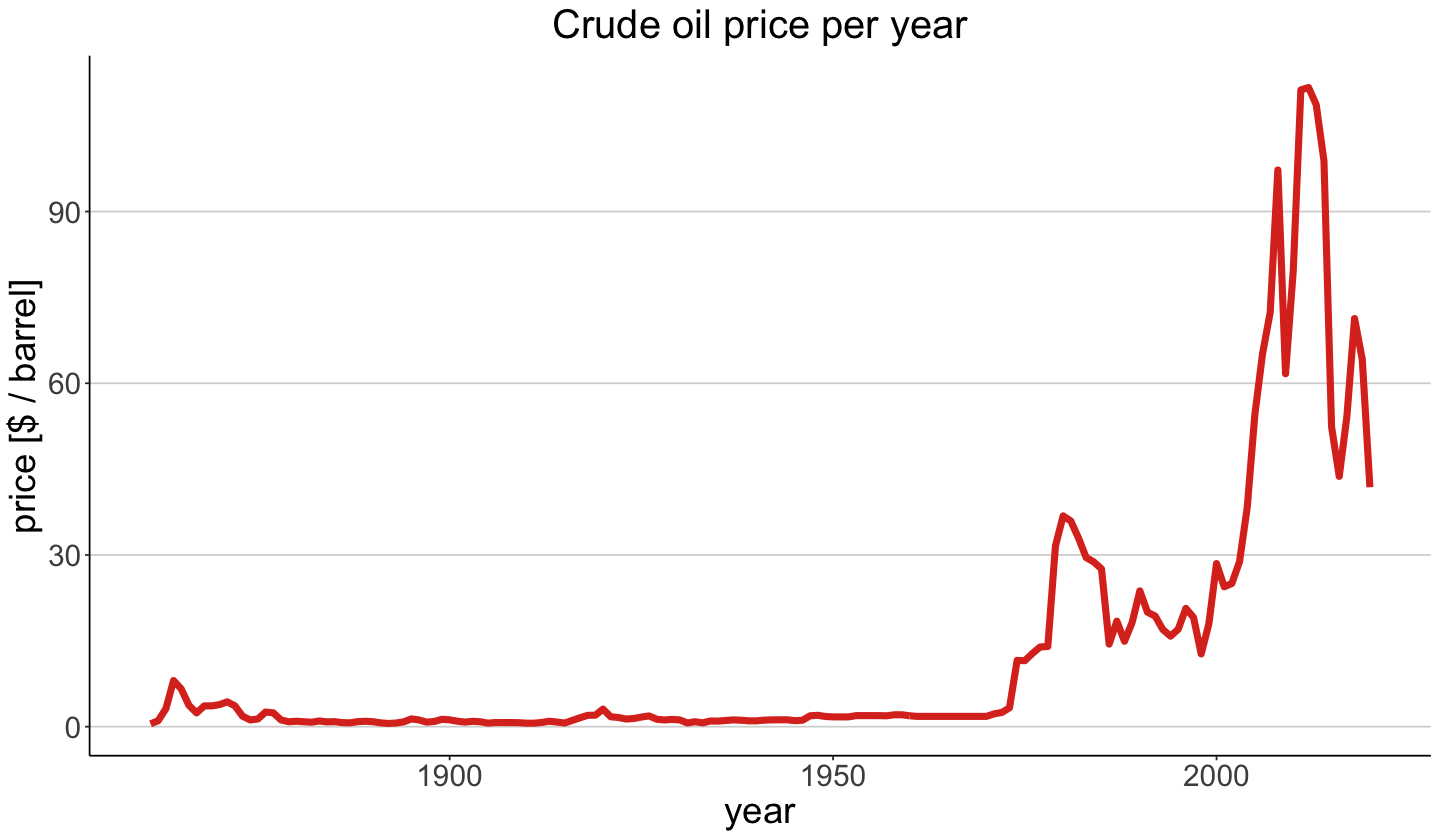

In [204]:
oil_plot <- create_lineplot(
    data   = oil.df,
    x      = "year",
    y      = "price",
    title  = "Crude oil price per year",
    xlabel = "year", 
    ylabel = "price [$ / barrel]"
)
oil_plot

## 2.3 - Which is the highest price in history? When did it occur?

As we did before when dealing with lakes in Exercise 1, we get the *index* of the highest price so that we can go back to the year in which the maximum in reached.

In [10]:
max_oil_price_idx <- which.max(oil.df[,"price"])
max_oil_price     <- oil.df[max_oil_price_idx, "price"]
max_oil_year      <- oil.df[max_oil_price_idx, "year"]

cat(
    "The highest crude oil price has been",
    max_oil_price,
    "$/barrel, reached in",
    max_oil_year
)

The highest crude oil price has been 111.6697 $/barrel, reached in 2012

## 2.4 - Plot the forward-derivative of the curve

Instead of defining a custom function that implements the forward-derivative formula, we rely on the ```diff()``` function, whose implementation is exaclty the same as the forward-derivative. 

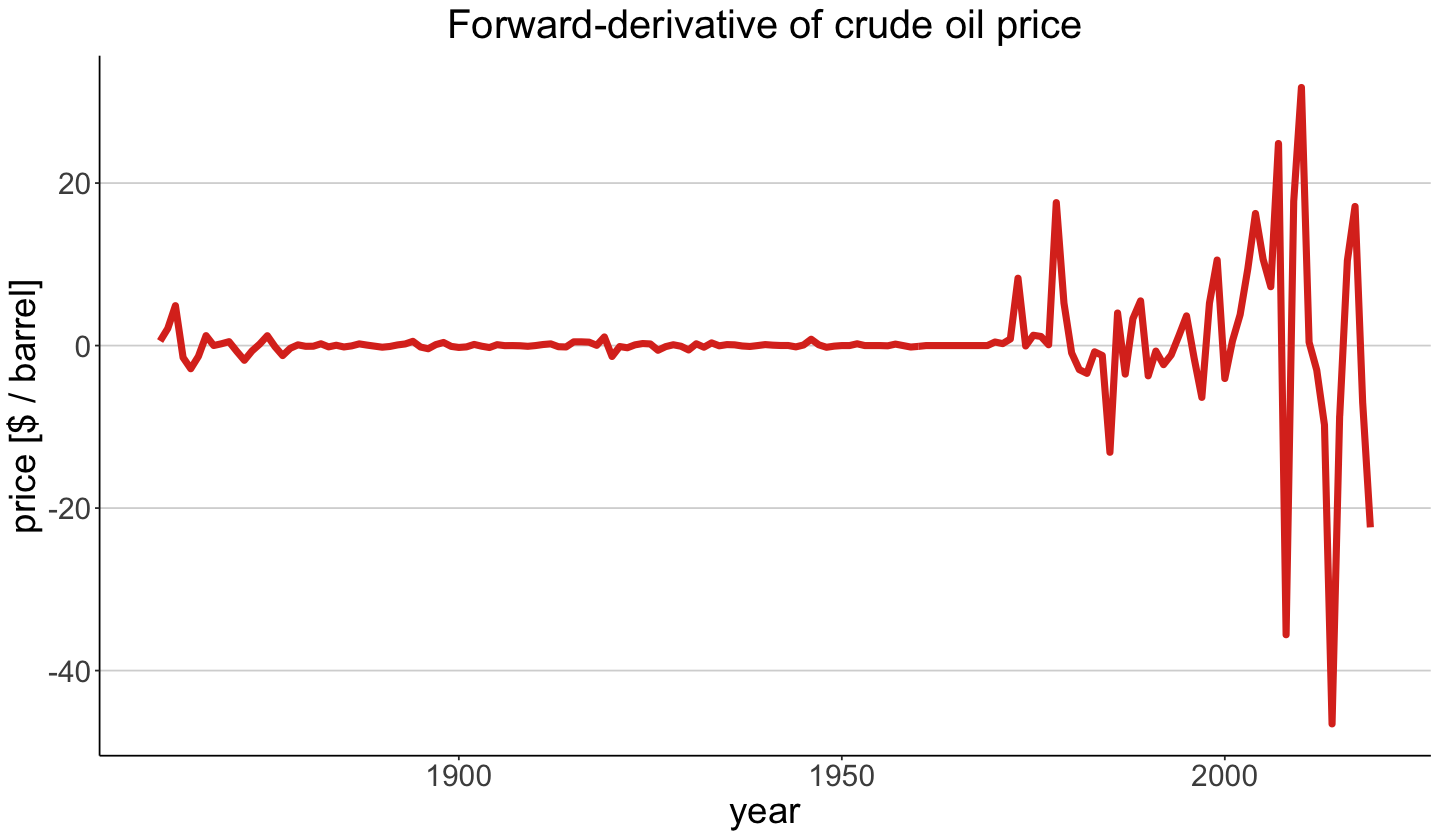

In [37]:
# compute the forward-derivative
oil.df["price_d"] = c(diff(oil.df[,"price"]), NA)

deriv_plot <- create_lineplot(
    data   = na.omit(oil.df),
    x      = "year",
    y      = "price_d",
    title  = "Forward-derivative of crude oil price",
    xlabel = "year", 
    ylabel = "price [$ / barrel]"
)

deriv_plot

---

# Exercise 3 - World Coal Production

## 3.1 - Write R code that is able to read the file and import it into a tibble structure

The function ```read_csv()``` reads data from file and returns it into a tibble structure. 

In [12]:
# localize data file
data_folder = "data/"
data_file   = "coal-production-by-country.csv"

# load data
coal_df <- read_csv(
    file=paste(data_folder, data_file, sep=""), 
    col_types=c(col_character(),col_character(),col_double(), col_double())
)

# change column names
colnames(coal_df) <- c("entity", "code", "year", "coal_prod")

head(coal_df)

entity,code,year,coal_prod
<chr>,<chr>,<dbl>,<dbl>
Afghanistan,AFG,1900,0
Afghanistan,AFG,1901,0
Afghanistan,AFG,1902,0
Afghanistan,AFG,1903,0
Afghanistan,AFG,1904,0
Afghanistan,AFG,1905,0


## 3.2 - Count the number of countries available in the file and produce a barplot with the number of entries for each country

First, we create a table of the available countries and turn it into a dataframe structure. This allows to quickly count the number of available countries as the number of the newly created dataframe rows. 

Then, to create the barplot, we rely again on ggplot. However, since the number of available countries is significant, we split the barplot into four sub-barplots to simplify the visualization.

In our dataset there are 200 unique countries avaiable

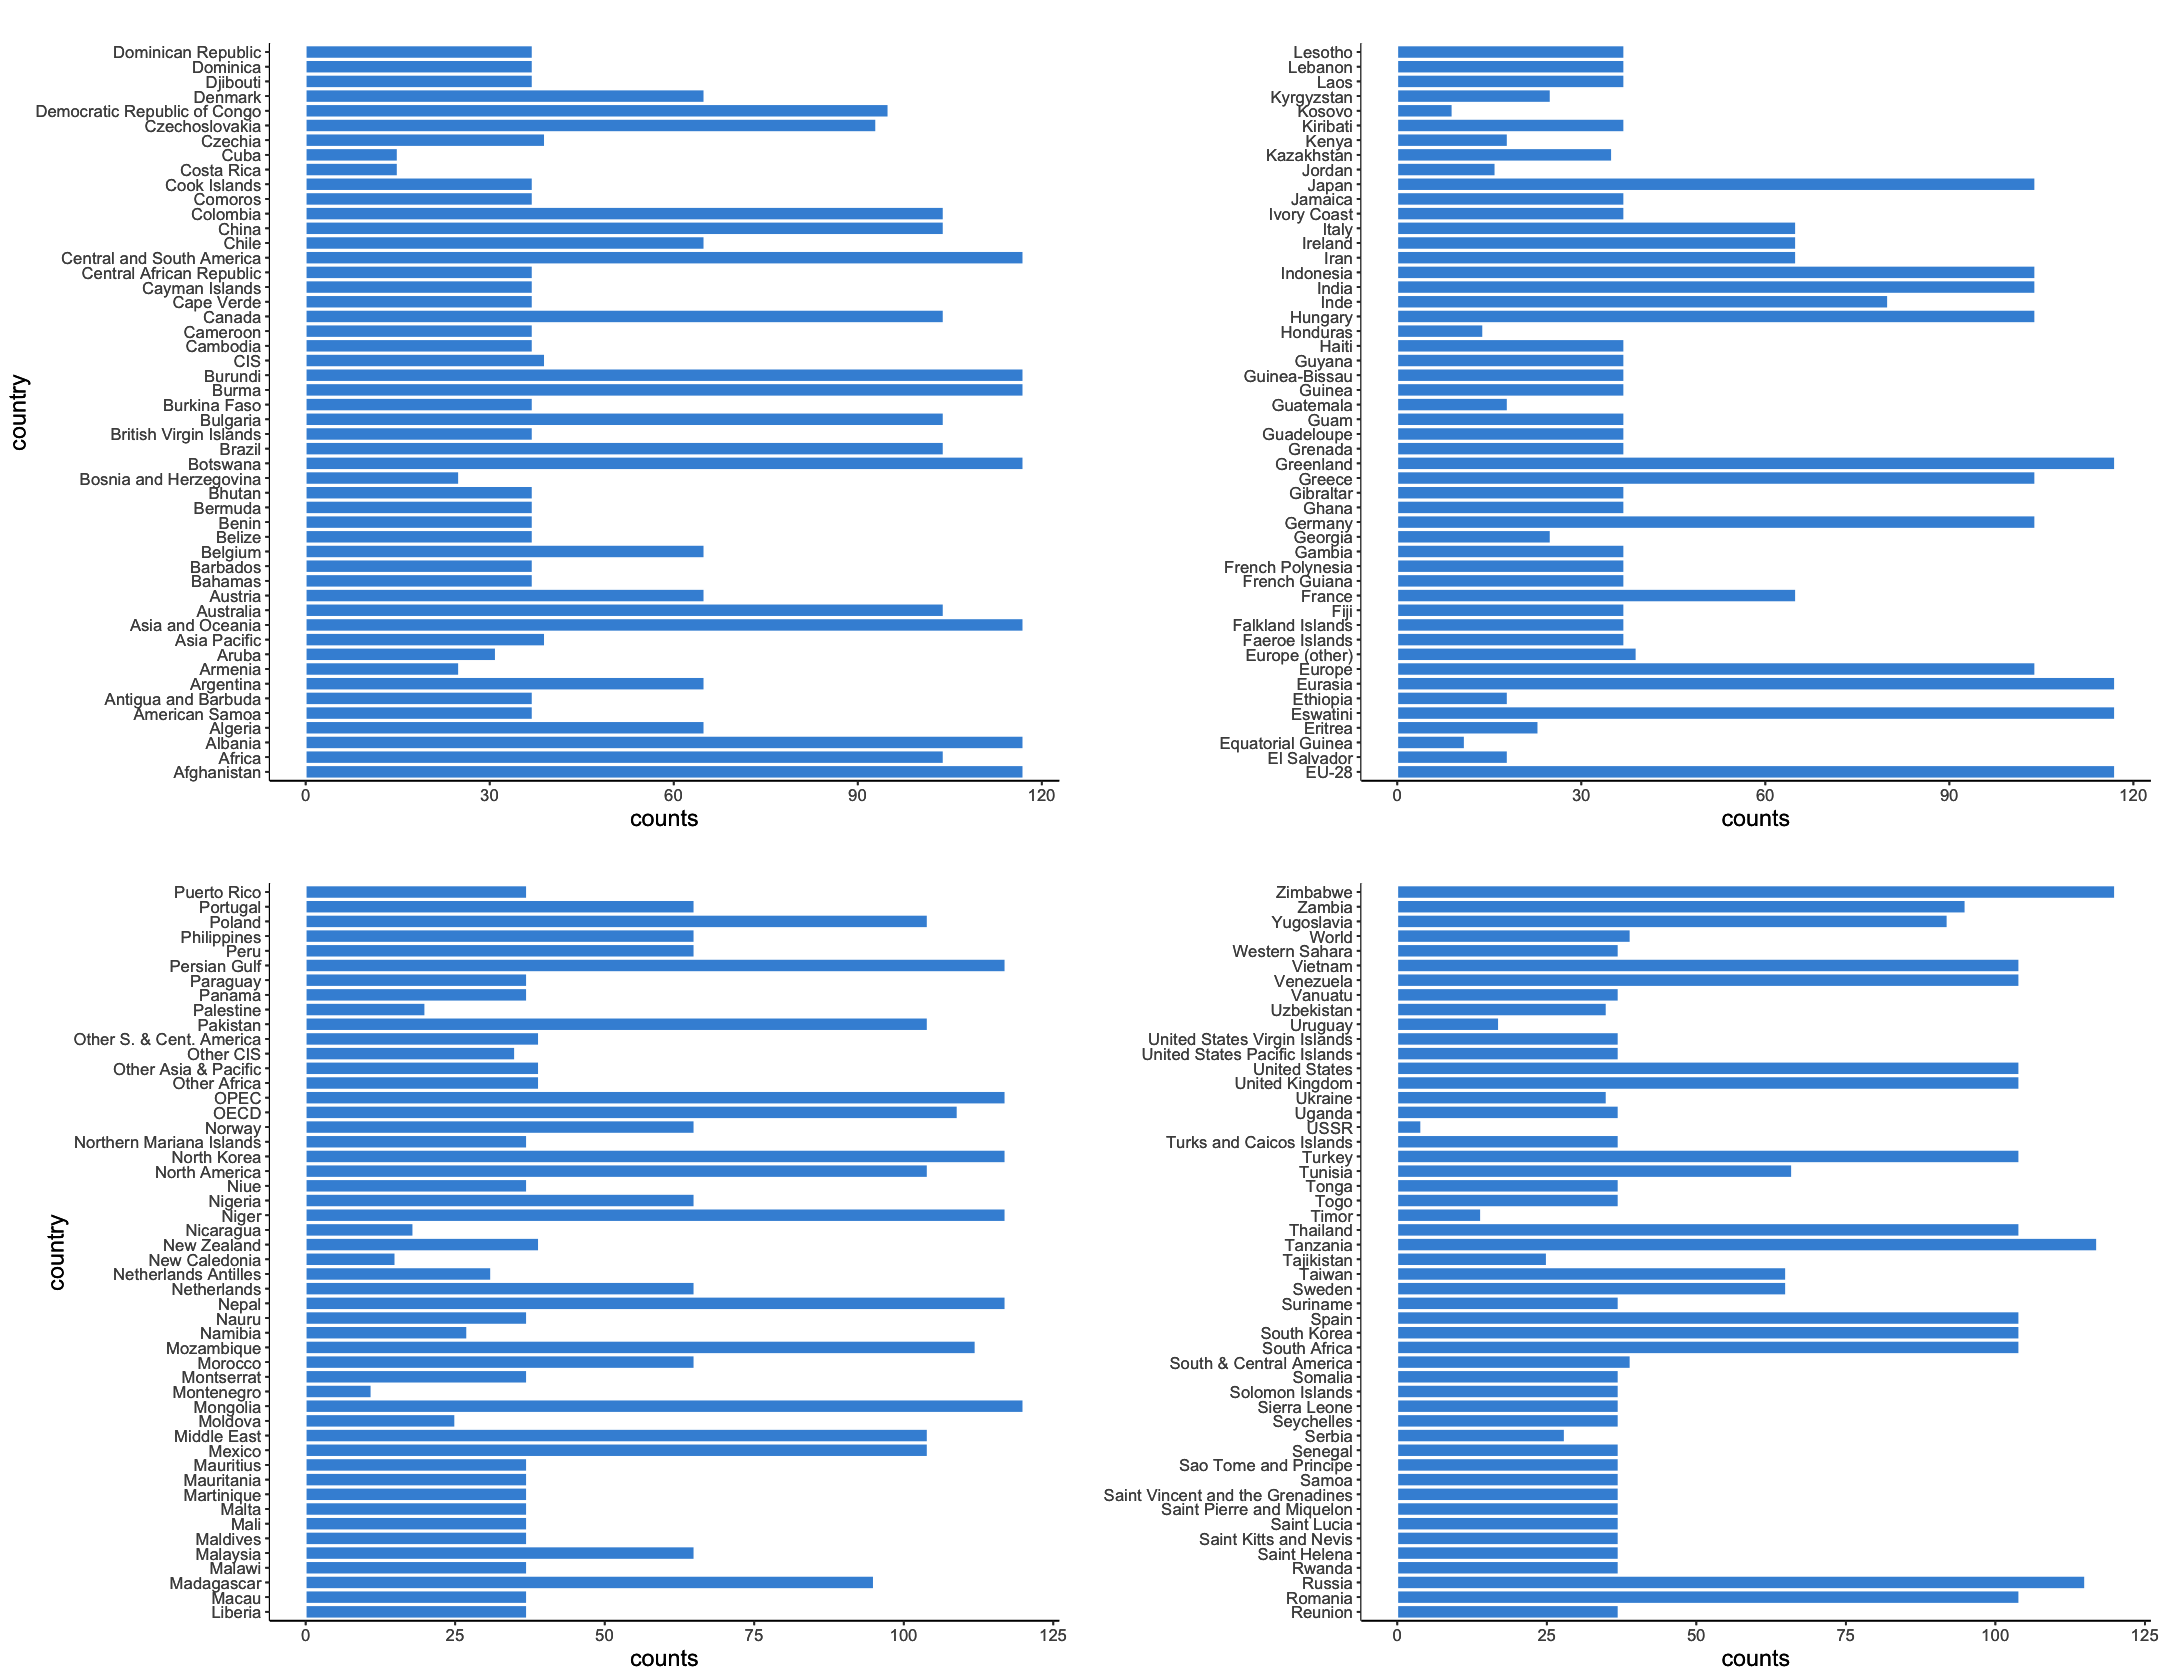

In [191]:
# count the unique countries available in data
unique_countries <- as.data.frame(table(coal_df[,"entity"]))
colnames(unique_countries) <- c("country", "counts")
n_unique <- nrow(unique_countries)

cat(
    "In our dataset there are",
    n_unique,
    "unique countries avaiable"
)


# create the barplots
bar1 <- create_barplot(
    data     = unique_countries[1:50,],    
    fontsize = 14, 
    x        = "counts", 
    y        = "country", 
    title    = "", 
    xlabel   = "counts", 
    ylabel   = "country"
)
bar2 <- create_barplot(
    data     = unique_countries[51:100,],  
    fontsize = 14, 
    x        = "counts", 
    y        = "country", 
    title    = "", 
    xlabel   = "counts", 
    ylabel   = ""
)
bar3 <- create_barplot(
    data     = unique_countries[101:150,], 
    fontsize = 14, 
    x        = "counts", 
    y        = "country", 
    title    = "", 
    xlabel   = "counts",
    ylabel   = "country"
)
bar4 <- create_barplot(
    data     = unique_countries[151:200,], 
    fontsize = 14, 
    x        = "counts", 
    y        = "country", 
    title    = "", 
    xlabel   = "counts",
    ylabel   = ""
)

plots <- list(bar1, bar2, bar3, bar4)

options(repr.plot.width=18, repr.plot.height=14)
grid.draw(ggarrange(plots=plots, widths=c(1,1)))
options(repr.plot.width=std_width, repr.plot.height=std_height)

## 3.3 - Selecting only the year after 1970, determine the total integrated production for each country and print the top 5 Countries with highest coal productions

To select only data after year 1970 we use the ```filter()``` function and slice the "year" column accordingly. Next, we use the ```group_by()``` function to group data by country. This way, we customize the summary using the ```summarize()``` function so that we create a tibble structure with the following information for each country:

- number of entries (i.e. how many times we find the same country in data)
- mean coal production over the years
- maximum coal production 
- minimum coal production
- *integrated coal production over the years*

The last column is actually the exercise request, thus we sort the tibble structure in descending order considering just that column. 

In [15]:
# select only data after year 1970
new_coal_df <- filter(coal_df, year > 1970)

# group by country and compute the integrated coal production
new_coal_group <- new_coal_df %>% group_by(entity)
summary <- new_coal_group %>% summarize(
    n_entries   = n(),
    mean_prod   = mean(coal_prod, na.rm=T),
    max_prod    = max(coal_prod,  na.rm=T),
    min_prod    = min(coal_prod,  na.rm=T),
    sum_prod    = sum(coal_prod,  na.rm=T)
)

# NOTE: we see that the top 5 coal production entities are not countries (exept China).
#       Since the question asks for "countries" we expand our search to the top 15 and
#       filter out "World" and other continests such as Asia ecc..
head(arrange(summary, desc(sum_prod)), n=15)

entity,n_entries,mean_prod,max_prod,min_prod,sum_prod
<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
World,39,32310.596,46548.716,21461.501,1260113.24
Asia Pacific,39,17698.474,34644.414,5794.429,690240.47
Asia and Oceania,46,14833.564,36171.730,3719.136,682343.93
China,39,11783.709,22171.380,3614.607,459564.65
OECD,38,11283.005,12337.354,9152.486,428754.18
North America,39,6267.780,7248.630,4355.640,244443.42
United States,39,5796.637,6694.609,3972.480,226068.84
Eurasia,46,3433.123,4161.825,2534.925,157923.64
Europe,39,3843.644,6651.071,1810.835,149902.11


## 3.4 - For the 5 top Countries, create a plot of production as a function of time

The previous question showed us that the top 5 countries with the hightest integrated coal production are

1. China
2. United States
3. Russia
4. Australia
5. India

To create the ```ggplot``` it is convenient to build a new tibble with only the top 5 countries inside.

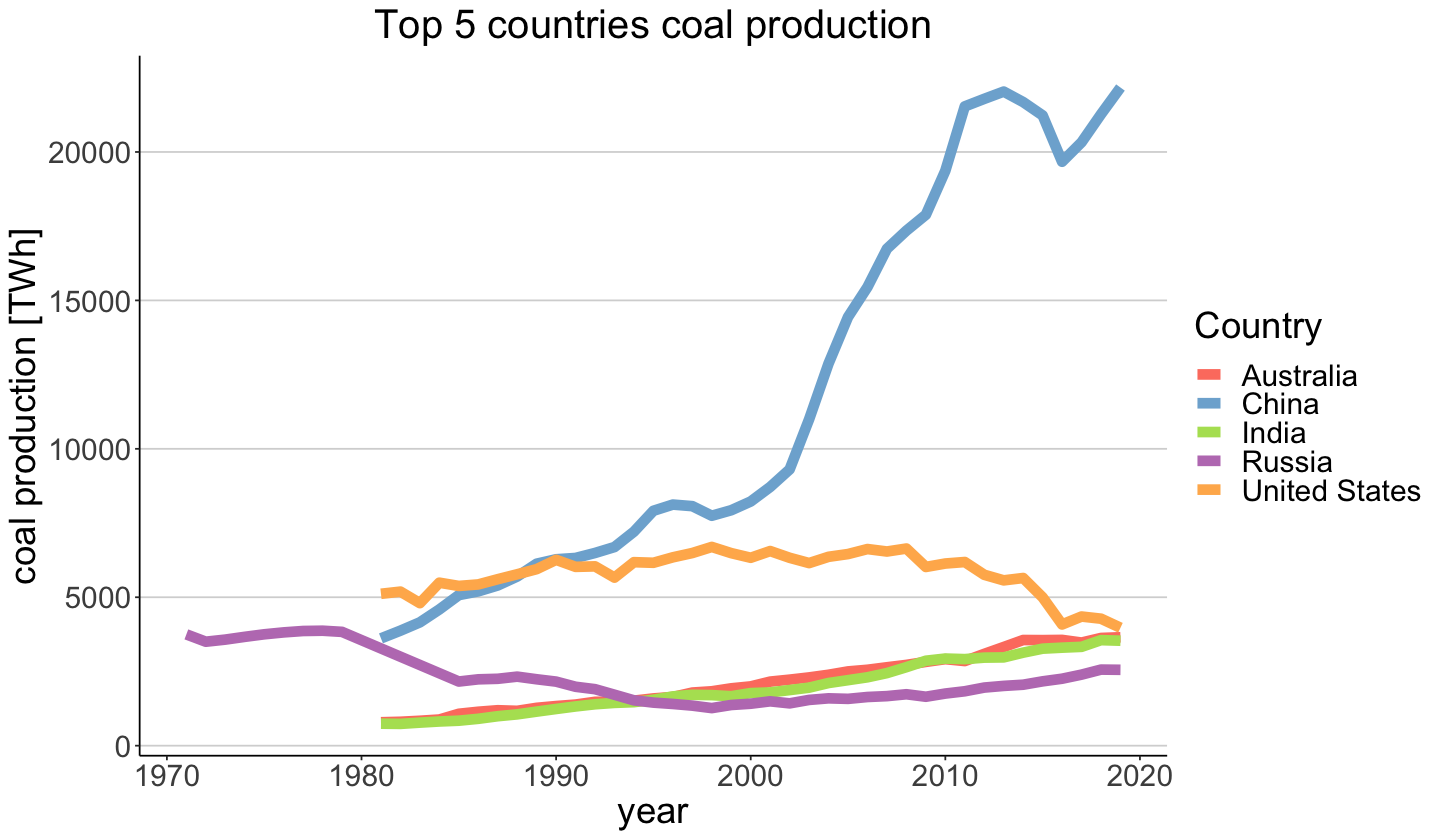

In [38]:
top_countries <- c(
    "China"        ,
    "United States",
    "Russia"       ,
    "Australia"    ,
    "India"         
)

top_countries_df <- filter(new_coal_df, entity %in% top_countries)

coal_plot <- create_lineplot(
    data    = top_countries_df,
    x       = "year",
    y       = "coal_prod",
    group   = "entity",
    color   = NULL,
    palette = colors,
    lw      = 3,
    title   = "Top 5 countries coal production",
    xlabel  = "year",
    ylabel  = "coal production [TWh]",
    clabel  = "Country"
)
coal_plot

## 3.5 - Generate a plot with the cumulative sum of the World’s coal production over the years

To compute the cumulative sum of the World's coal production overt the year we first filter the dataset and select only entity equals to "World". Then we append to the newly created dataframe a new column, named "sum_prod", containing the cumulative sum computed with the ```cumsum()``` function over the coal production.

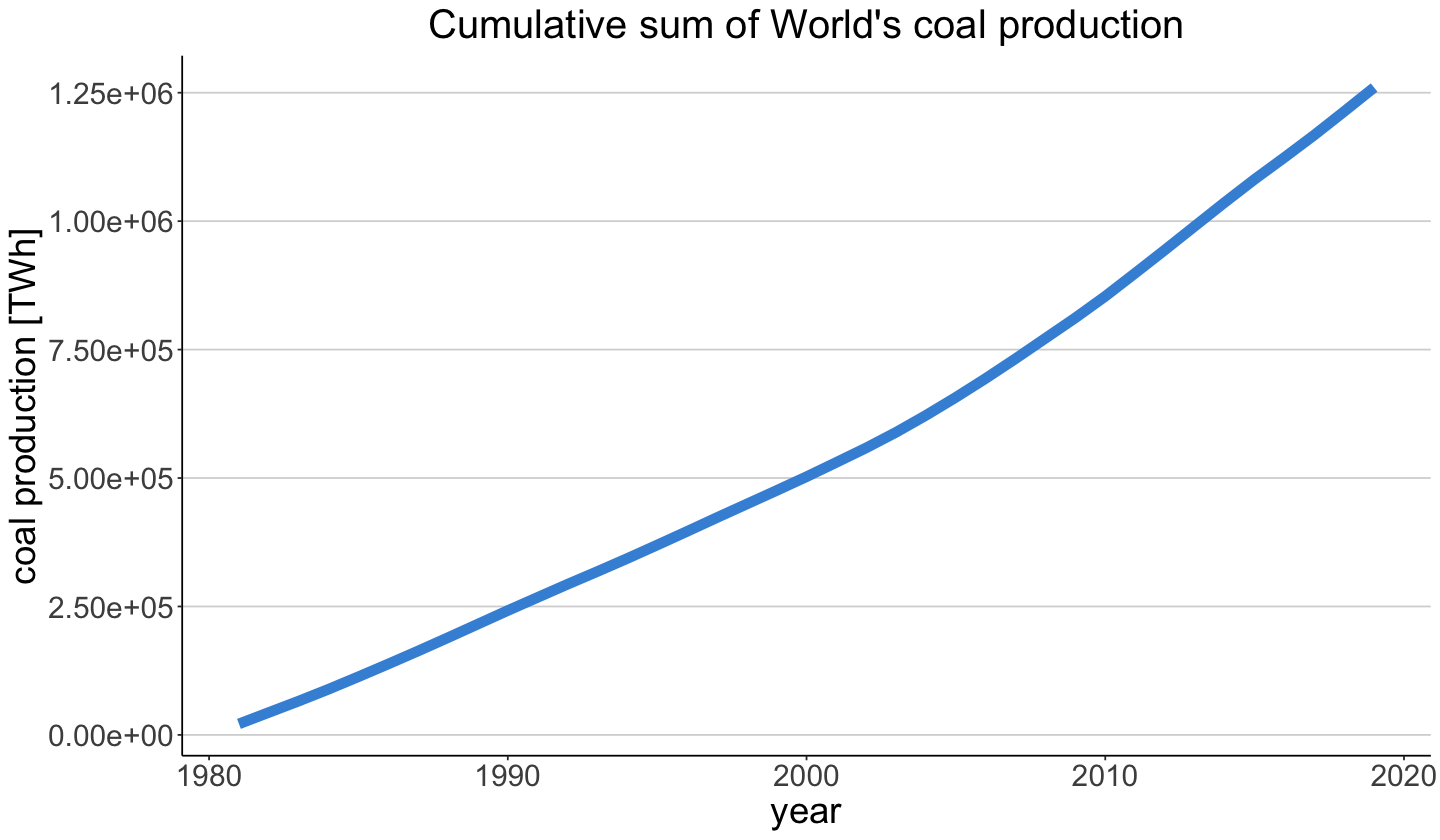

In [51]:
world_cumsum_df <- filter(new_coal_df, entity=="World")
world_cumsum_df[,"sum_prod"] <- cumsum(world_cumsum_df[,"coal_prod"])

sum_coal_plot <- create_lineplot(
    data    = world_cumsum_df,
    x       = "year",
    y       = "sum_prod",
    color   = "#4192D9",
    lw      = 3,
    title   = "Cumulative sum of World's coal production",
    xlabel  = "year",
    ylabel  = "coal production [TWh]",
    scilab  = TRUE,
    # ylog    = TRUE,
)
sum_coal_plot

---

# Exercise 4 - Covid19 Vaccine Data

## 4.0 - Load data

Let us load the first Covid-19 data file, containing a summary on the vaccination data grouped by vaccine type and country.

In [89]:
# localize data
data_folder = "data/"
data_file   = "vaccinations-by-manufacturer.csv"

# load data 
vaccine_manufacturer_df <- read_csv(
    file=paste(data_folder, data_file, sep=""), 
    show_col_types = FALSE
)

head(vaccine_manufacturer_df)

location,date,vaccine,total_vaccinations
<chr>,<date>,<chr>,<dbl>
Argentina,2020-12-29,Moderna,2
Argentina,2020-12-29,Oxford/AstraZeneca,3
Argentina,2020-12-29,Sinopharm/Beijing,1
Argentina,2020-12-29,Sputnik V,20481
Argentina,2020-12-30,Moderna,2
Argentina,2020-12-30,Oxford/AstraZeneca,3


## 4.1 - ```filter()``` the original ```tibble``` by selecting the following country: Italy

We simply use the ```filter()``` function to select only rows with location equals to Italy.

In [90]:
italy_vaccine_df <- filter(vaccine_manufacturer_df, location=="Italy")
head(italy_vaccine_df)

location,date,vaccine,total_vaccinations
<chr>,<date>,<chr>,<dbl>
Italy,2020-12-27,Moderna,2
Italy,2020-12-27,Pfizer/BioNTech,7346
Italy,2020-12-28,Moderna,6
Italy,2020-12-28,Pfizer/BioNTech,8847
Italy,2020-12-29,Moderna,10
Italy,2020-12-29,Pfizer/BioNTech,9941


## 4.2 - Plot the number of vaccines given as a function of time for the different vaccine manufacturer

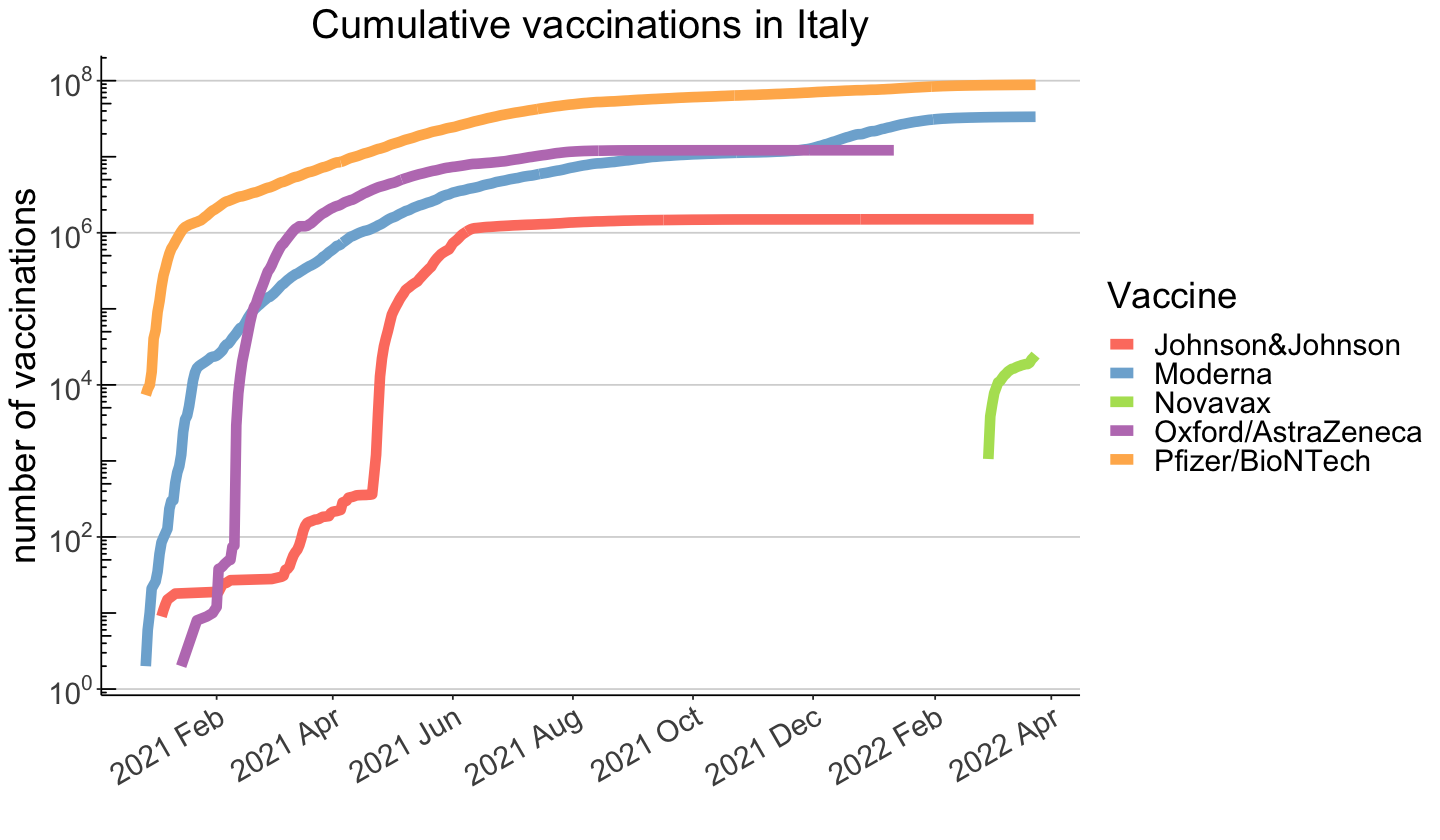

In [91]:
vaccine_plot <- create_lineplot(
    data       = italy_vaccine_df,
    x          = "date",
    y          = "total_vaccinations",
    group      = "vaccine",
    color      = NULL,
    palette    = colors, 
    lw         = 3,
    ylog       = TRUE, # set to FALSE for linear scale
    ylog_ticks = TRUE, # set to FALSE for linear scale
    scilab     = FALSE,
    title      = "Cumulative vaccinations in Italy",
    xlabel     = "",
    ylabel     = "number of vaccinations",
    clabel     = "Vaccine"
) + scale_x_date(date_breaks = "2 months", date_labels = "%Y %b") + 
    theme(axis.text.x = element_text(angle = 30, hjust = 1))

vaccine_plot 

## 4.3 - From the same tibble plot the total number of vaccines shot per day in Italy

The first and most straightforward idea is to compute the total cumulative vaccination count by summing all "total_vaccinations" entries grouped by date:

```R
italy_tot_df <- aggregate(italy_vaccine_df$total_vaccinations, by=list(date=italy_vaccine_df$date), sum)
```

Then, the daily number of total vaccinations can be computed using the ```diff()``` function over the cumulative total vaccinations as follows:

```R
italy_tot_df["daily_vaccinations"] <- c(diff(italy_tot_df[,"total_vaccinations"]), NA)
```

**HOWEVER** it does not work as expected. The total cumulative number of vaccinations turns out to be not monotonically increasing. The main reason is that AstraZeneca data stops a few months before the other vaccines, instead of remaining constant. Thus, we get the following, wrong, result.

<img src="daily_wrong3.png" alt="daily_wrong.png" width="500"/>

Instead, we can follow a different approach that basically swaps the two operations introduced above. First, we compute the daily vaccination count using the ```diff()``` function grouping the dataset by "vaccine". This way we can also plot the daily trend for each vaccine. Then, we sum all the contributions from the different vaccine to compute the total daily number of vaccinations. 

In [129]:
# create a new empy dataframe
vaccines_df <- data.frame(
    location = character(),
    date     = as.Date(character()),
    vaccine  = character(),
    total_vaccinations = integer(),
    daily_vaccinations = integer()
)

# for each vaccine in data we append the corresponding subset
# and add the "daily_vaccinations" column
for (vac in unique(as.matrix(italy_vaccine_df[,"vaccine"]))) {
    sub_df <- subset(italy_vaccine_df, vaccine==vac)
    sub_df["daily_vaccinations"] <- c(0, diff(as.matrix(sub_df[,"total_vaccinations"])))
    sub_df <- subset(sub_df, daily_vaccinations>=0) # the number of daily vaccinations must be non-negative
                                                    # this operation should do nothing if data is correct
    vaccines_df <- rbind(vaccines_df,sub_df) 
}

# compute the total daily vaccination count
tot_vaccines_df <- aggregate(vaccines_df["daily_vaccinations"], by=vaccines_df["date"], sum)

tot_vaccines_df["vaccine"]  <- "Total"
tot_vaccines_df["location"] <- "Italy"
tot_vaccines_df <- tot_vaccines_df[c(4, 1, 3, 2)]

# add the total daily vaccination count labeled as vaccine=="Total"
vaccines_df <- vaccines_df %>% add_row(tot_vaccines_df)

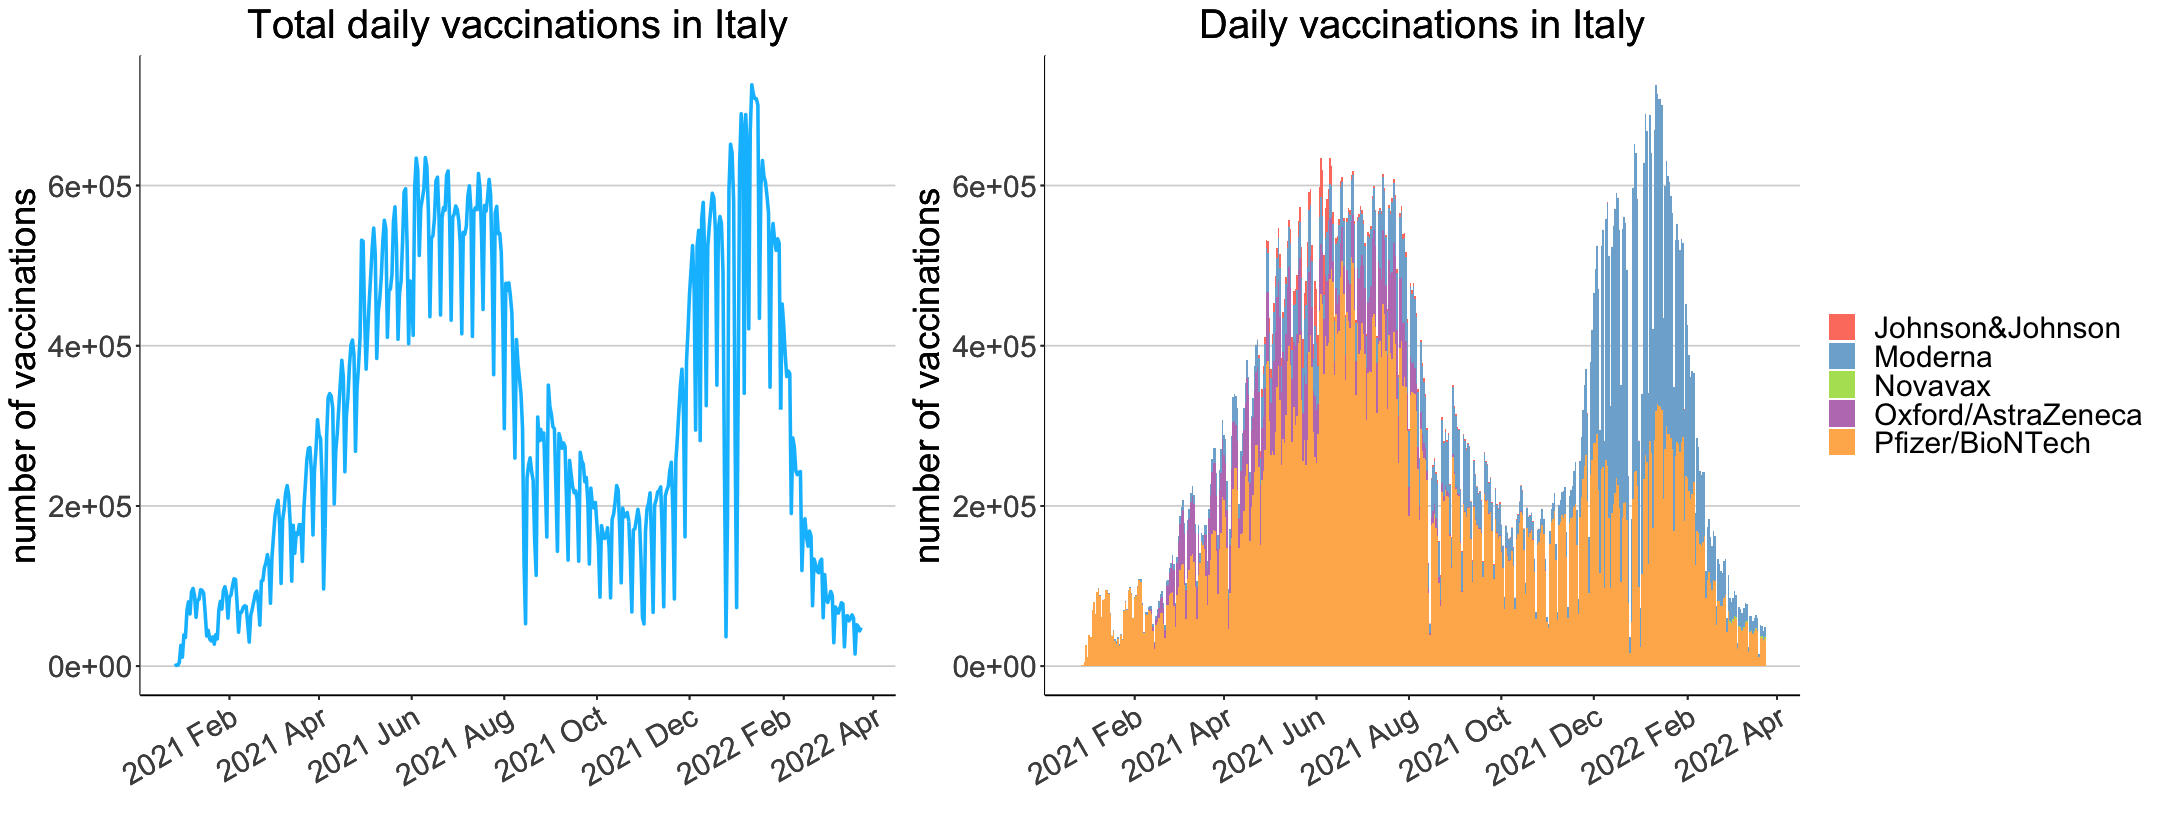

In [194]:
# total daily vaccinations lineplot
tot_daily_vaccinations_plot <- create_lineplot(
    data   = filter(vaccines_df, vaccine=="Total"),
    x      = "date",
    y      = "daily_vaccinations",
    lw     = 1,
    color  = "deepskyblue",
    title  = "Total daily vaccinations in Italy",
    xlabel = "",
    ylabel = "number of vaccinations"   
) + 
    scale_x_date(date_breaks = "2 months", date_labels = "%Y %b") + 
    theme(axis.text.x = element_text(angle = 30, hjust = 1))

# daily vaccinations (grouped by vaccine) stacked barplot
daily_vaccinations_plot <- create_barplot(
    data = filter(vaccines_df, vaccine!="Total"),
    x = "date",
    y = "daily_vaccinations",
    group = "vaccine",
    fillcolor = NULL,
    palette = colors,
    title  = "Daily vaccinations in Italy",
    xlabel = "",
    ylabel = "number of vaccinations"   
    
) +
    scale_x_date(date_breaks = "2 month", date_labels = "%Y %b") + 
    theme(axis.text.x = element_text(angle = 30, hjust = 1)) + 
    theme(
        panel.grid.major.y = element_line(
            color = alpha("black",0.2),
            size = 0.5,
            linetype = 1
        )
    )


plots <- list(tot_daily_vaccinations_plot, daily_vaccinations_plot)

options(repr.plot.width=18, repr.plot.height=7)
grid.draw(ggarrange(plots=plots, widths=c(1,1)))
options(repr.plot.width=std_width, repr.plot.height=std_height)

As we can see from the first plot and the left, the daily total number of vaccinations trend is now reasonable and completely different from the wrong trend showed before. To further validate this trend, we plot on the right the individial daily contribution of each vaccine: the stacked barplot clearly follows the same trend! 

## 4.4 - Do the same exercise for the following countries: Germany and United States

We re-use the same code showed before and place it into a for loop to avoid code repetition.

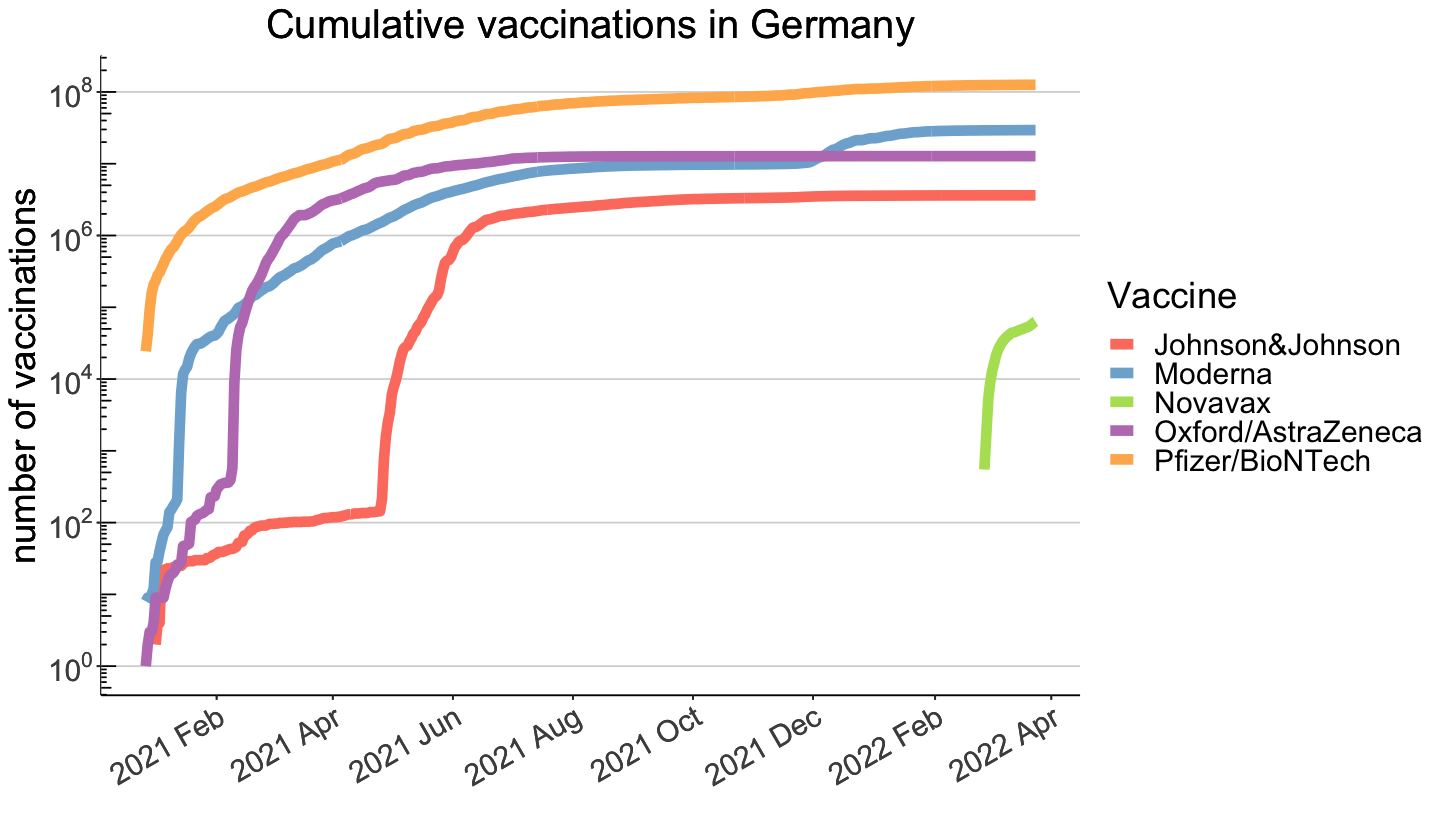

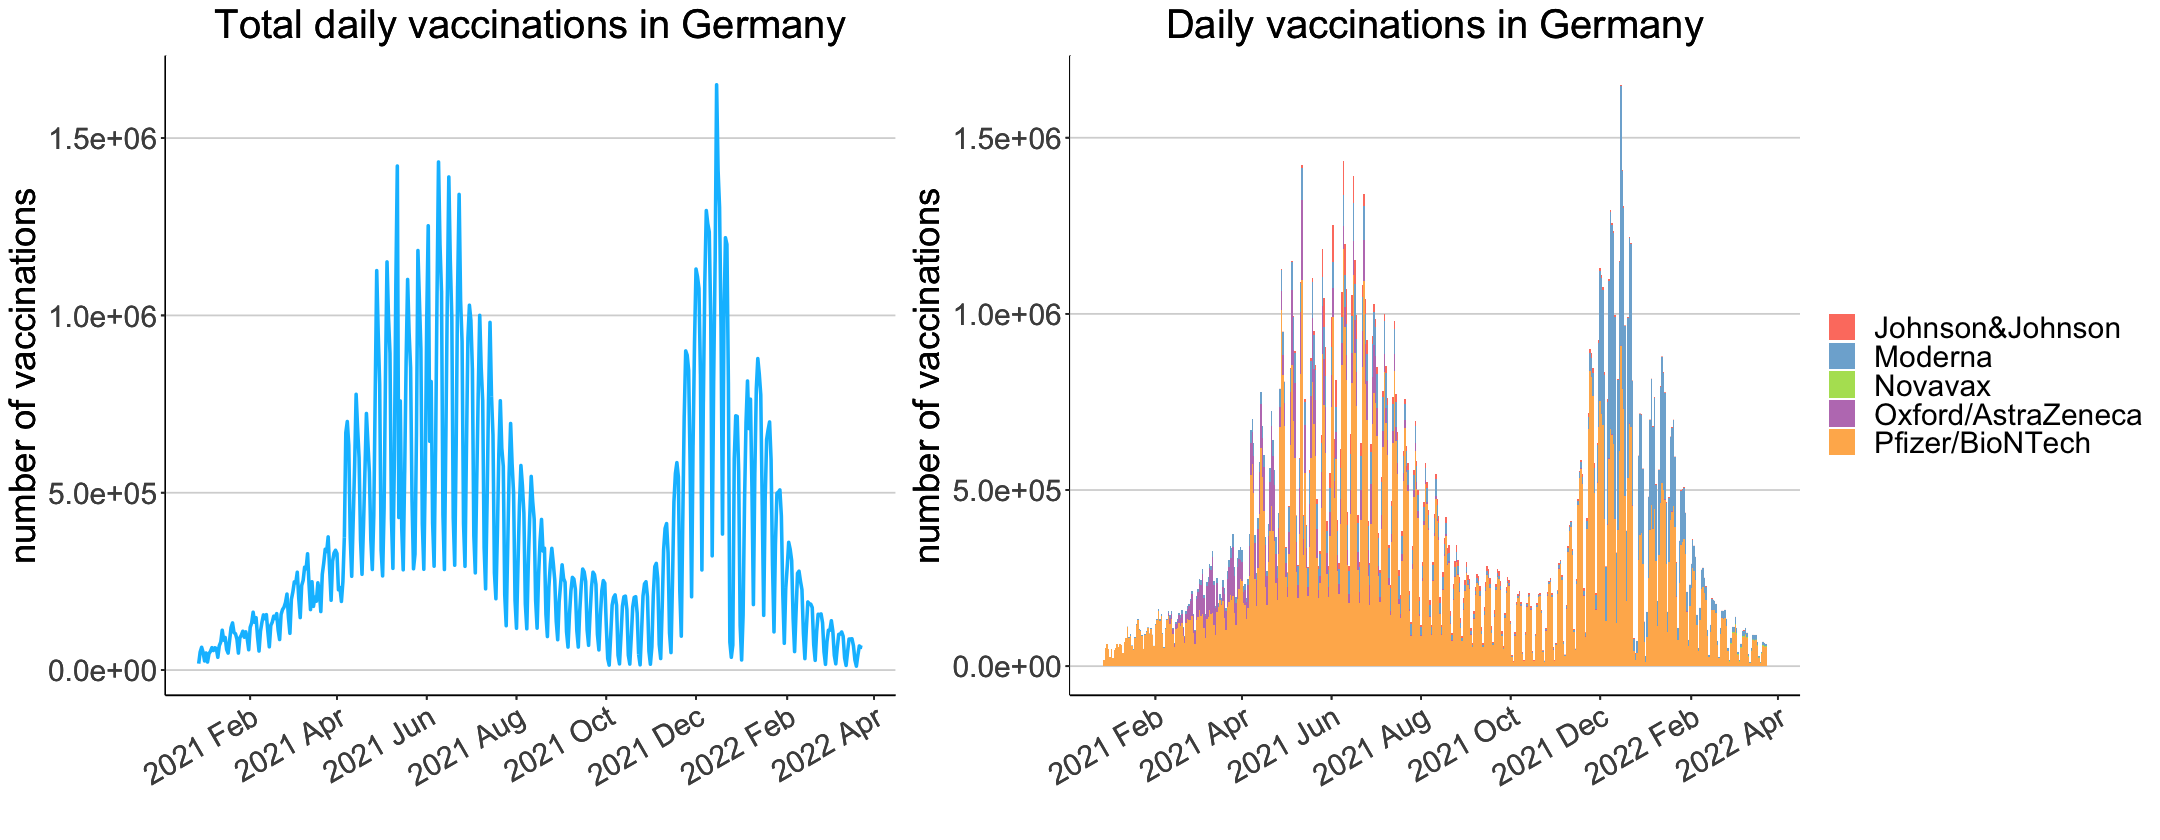

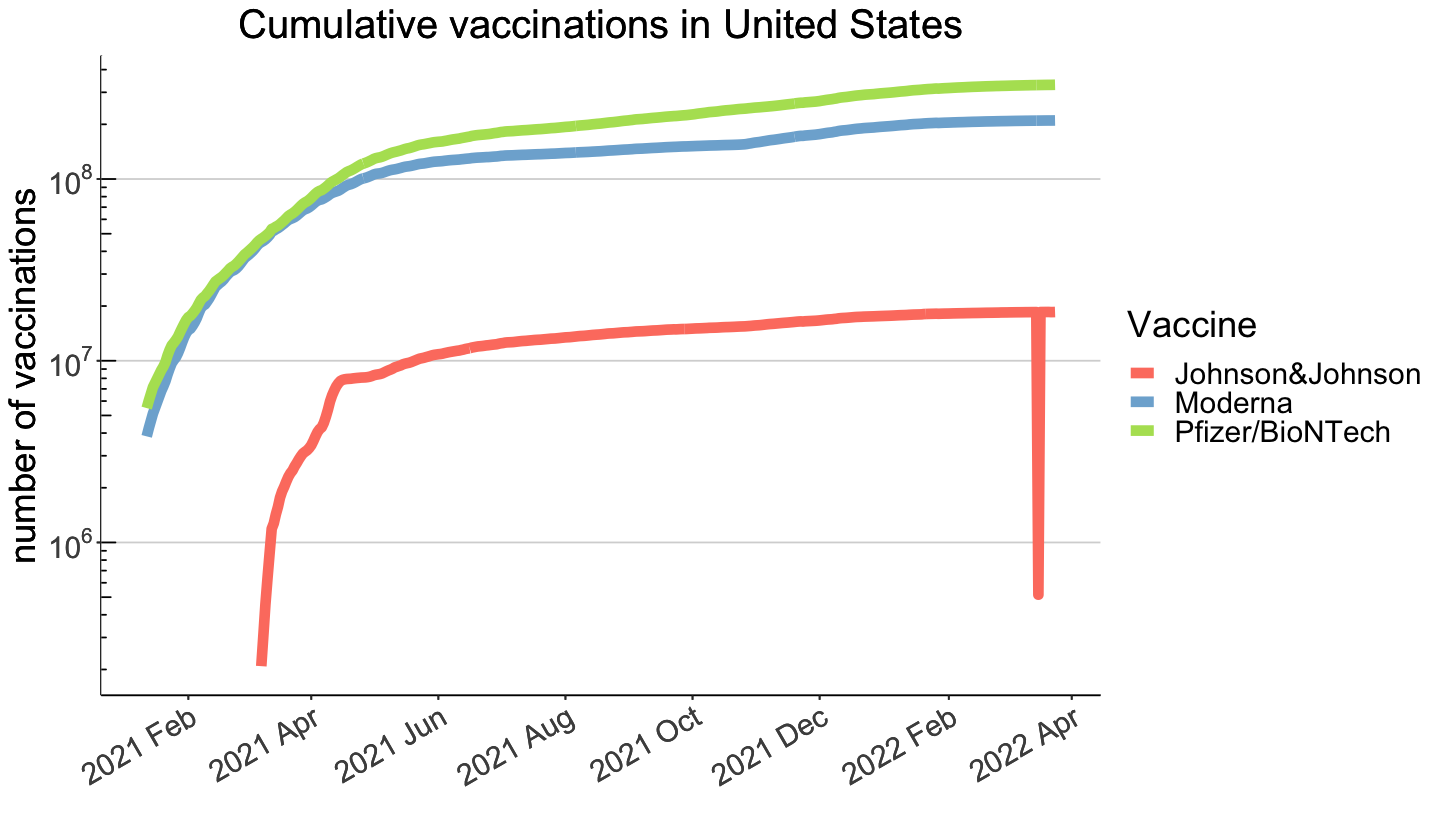

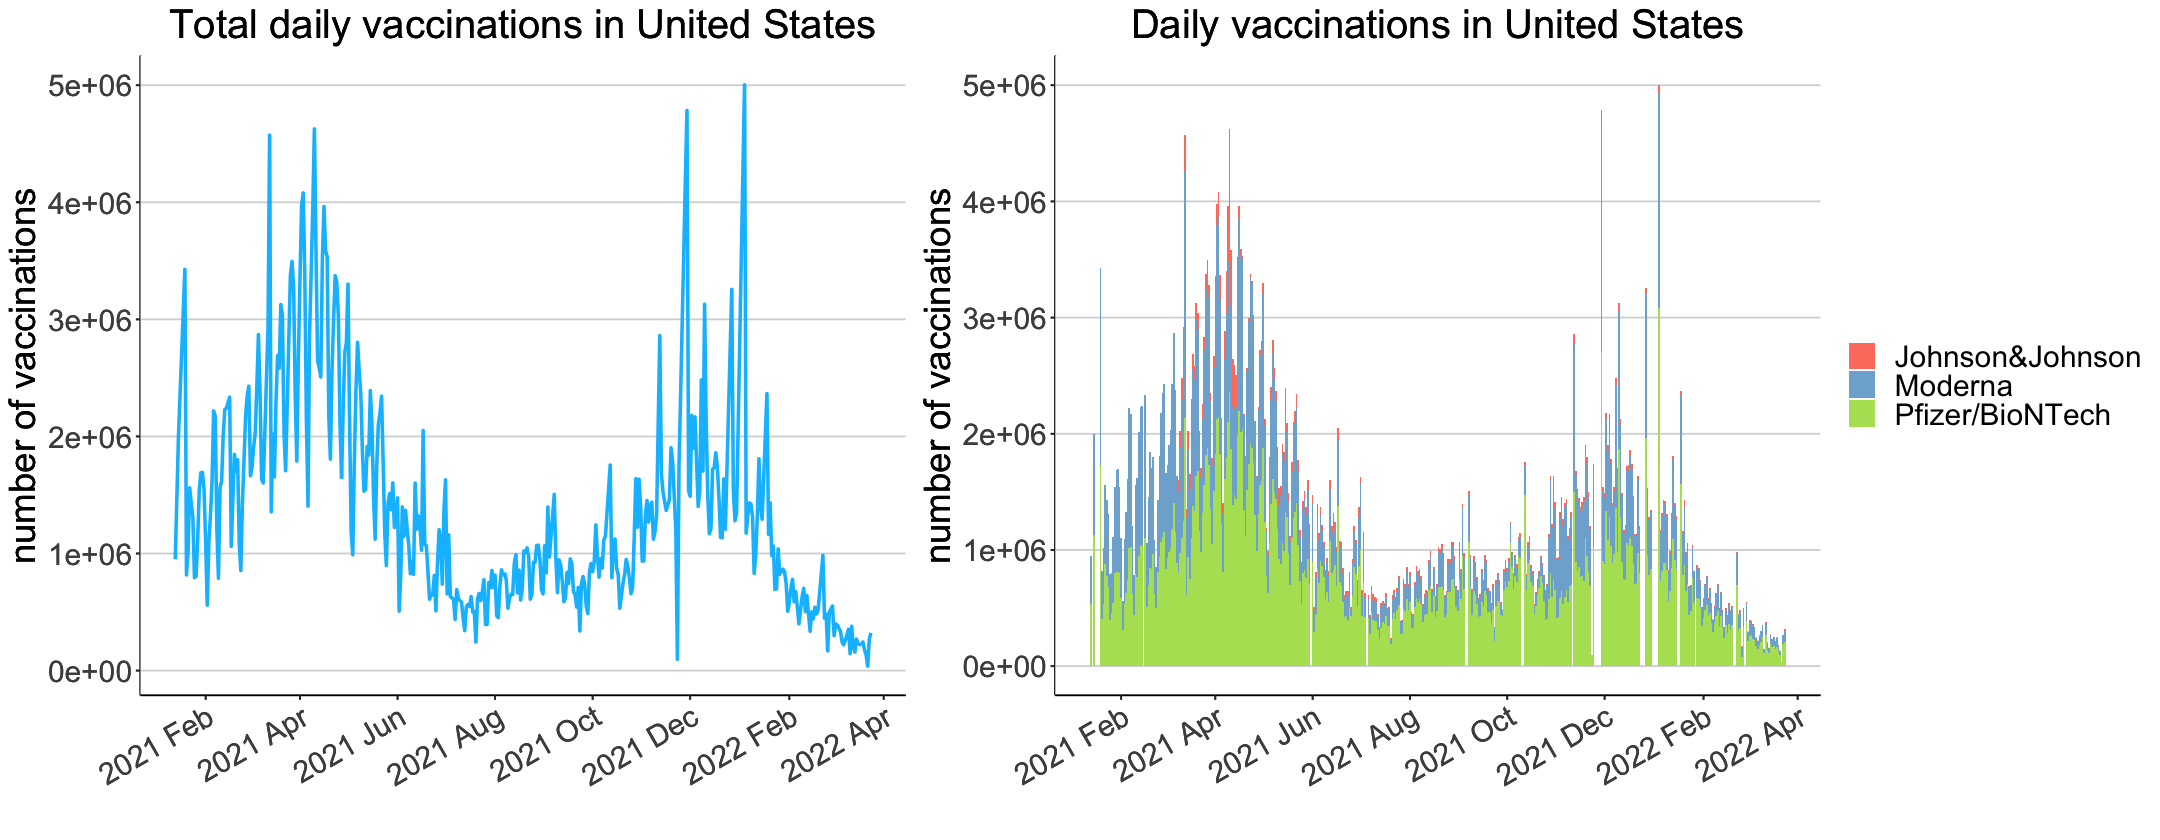

In [207]:
options(repr.plot.width=12, repr.plot.height=7)

# for loop over the two target countries
for (country in c("Germany", "United States")) {
    
    # filter data by country
    country_df <- filter(vaccine_manufacturer_df, location==country)
    country_df <- subset(country_df, total_vaccinations>0)
    
    # cumulative lineplot
    vaccine_plot <- create_lineplot(
        data       = country_df,
        x          = "date",
        y          = "total_vaccinations",
        group      = "vaccine",
        color      = NULL,
        palette    = colors, 
        lw         = 3,
        ylog       = TRUE, # set to FALSE for linear scale
        ylog_ticks = TRUE, # set to FALSE for linear scale
        scilab     = FALSE,
        title      = glue("Cumulative vaccinations in {country}"),
        xlabel     = "",
        ylabel     = "number of vaccinations",
        clabel     = "Vaccine"
    ) + 
    scale_x_date(date_breaks = "2 months", date_labels = "%Y %b") + 
    theme(axis.text.x = element_text(angle = 30, hjust = 1))

    grid.draw(ggarrange(plots=list(vaccine_plot), widths=c(1)))
    options(repr.plot.width=12, repr.plot.height=7)

    vaccines_df <- data.frame(
        location = character(),
        date     = as.Date(character()),
        vaccine  = character(),
        total_vaccinations = integer(),
        daily_vaccinations = integer()
    )

    for (vac in unique(as.matrix(country_df[,"vaccine"]))) {
        sub_df <- subset(country_df, vaccine==vac)
        sub_df["daily_vaccinations"] <- c(0, diff(as.matrix(sub_df[,"total_vaccinations"])))
        sub_df <- subset(sub_df, daily_vaccinations>0)

        vaccines_df <- rbind(vaccines_df,sub_df) 
    }
                        
    tot_vaccines_df <- aggregate(vaccines_df["daily_vaccinations"], by=vaccines_df["date"], sum)
    tot_vaccines_df["vaccine"]  <- "Total"
    tot_vaccines_df["location"] <- country
    tot_vaccines_df <- tot_vaccines_df[c(4, 1, 3, 2)]

    vaccines_df <- vaccines_df %>% add_row(tot_vaccines_df)
    # filter out data anomalies
    vaccines_df <- filter(vaccines_df, daily_vaccinations<1.5E+7)

    # total daily vaccinations lineplot
    tot_daily_vaccinations_plot <- create_lineplot(
        data   = filter(vaccines_df, vaccine=="Total"),
        x      = "date",
        y      = "daily_vaccinations",
        lw     = 1,
        color  = "deepskyblue",
        title  = glue("Total daily vaccinations in {country}"),
        xlabel = "",
        ylabel = "number of vaccinations"  ,
        scilab = TRUE, 
    ) + 
        scale_x_date(date_breaks = "2 months", date_labels = "%Y %b") + 
        theme(axis.text.x = element_text(angle = 30, hjust = 1))

    # daily vaccinations (grouped by vaccine) stacked barplot
    daily_vaccinations_plot <- create_barplot(
        data = filter(vaccines_df, vaccine!="Total"),
        x = "date",
        y = "daily_vaccinations",
        group = "vaccine",
        fillcolor = NULL,
        palette = colors,
        title  = glue("Daily vaccinations in {country}"),
        xlabel = "",
        ylabel = "number of vaccinations",
        scilab = TRUE,

    ) +
        scale_x_date(date_breaks = "2 month", date_labels = "%Y %b") + 
        theme(axis.text.x = element_text(angle = 30, hjust = 1)) + 
        theme(
            panel.grid.major.y = element_line(
                color = alpha("black",0.2),
                size = 0.5,
                linetype = 1
            )
        )

    plots <- list(tot_daily_vaccinations_plot, daily_vaccinations_plot)
    grid.draw(ggarrange(plots=plots, widths=c(1,1)))
    options(repr.plot.width=18, repr.plot.height=7)

}

In the "Cumulative vaccinations in United States" plot we see that *Johnson&Johnson* vaccine cumulative trend has a clear anomaly around March 2022. The sudden drop and increase of cumulative number of vaccinations is a clear data mistake and should not be taken into account in our analysis. Hence, we applied a specific filter to deal with that particular anomaly, and the daily trends are not affected by it. 

## 4.5 - Load different data

Load dataset containing country-by-country data on global Covid-19 vaccinations. This dataset includes some subnational locations and international aggregates. 

In [4]:
# localize data
data_folder = "data/"
data_file   = "vaccinations.csv"

# load data
vaccine_df <- read_csv(
    file=paste(data_folder, data_file, sep=""), 
    show_col_types = FALSE
)

head(vaccine_df)

location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,daily_vaccinations_per_million,daily_people_vaccinated,daily_people_vaccinated_per_hundred
<chr>,<chr>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,AFG,2021-02-22,0,0,NA,NA,NA,NA,0,0,NA,NA,NA,NA,NA
Afghanistan,AFG,2021-02-23,NA,NA,NA,NA,NA,1367,NA,NA,NA,NA,34,1367,0.003
Afghanistan,AFG,2021-02-24,NA,NA,NA,NA,NA,1367,NA,NA,NA,NA,34,1367,0.003
Afghanistan,AFG,2021-02-25,NA,NA,NA,NA,NA,1367,NA,NA,NA,NA,34,1367,0.003
Afghanistan,AFG,2021-02-26,NA,NA,NA,NA,NA,1367,NA,NA,NA,NA,34,1367,0.003
Afghanistan,AFG,2021-02-27,NA,NA,NA,NA,NA,1367,NA,NA,NA,NA,34,1367,0.003


## 4.6 - Selecting all the European countries in the tibble, plot the number of daily vaccinations per million as a function of date

First, we create a vector containing all european ISO codes. Then, we filter data by ISO code and finally plot the "daily_vaccinations_per_million" column grouped by country. 

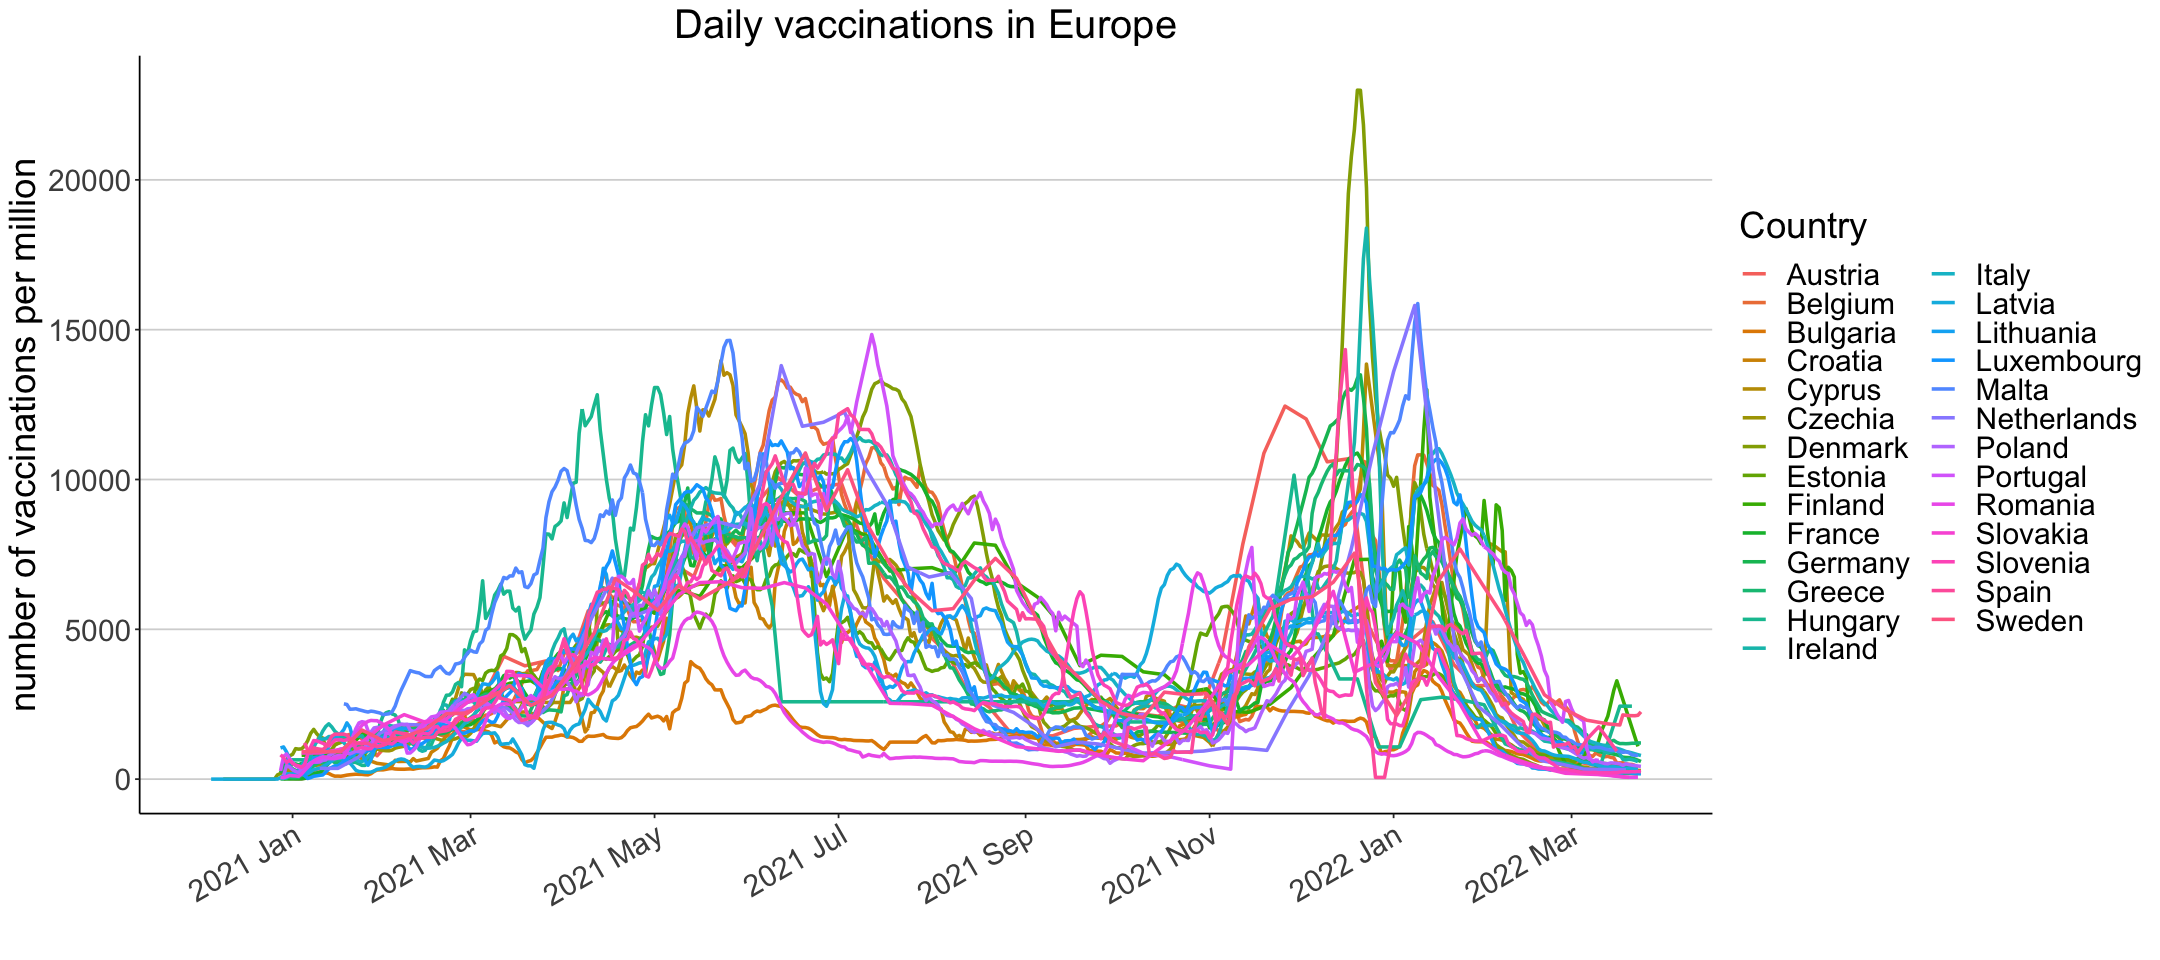

In [5]:
eur <- c(
    "AUT", "BEL", "BGR", "HRV", "CYP", "CZE", "DNK", "EST", "FIN",
    "FRA", "DEU", "GRC", "HUN", "IRL", "ITA", "LVA", "LTU", "LUX",
    "MLT", "NLD", "POL", "PRT", "ROU", "SVK", "SVN", "ESP", "SWE"
)
eur_vaccine_df <- filter(vaccine_df, iso_code %in% eur)

vaccine_plot <- create_lineplot(
    data    = subset(eur_vaccine_df, !is.na(daily_vaccinations_per_million)),
    x       = "date",
    y       = "daily_vaccinations_per_million",
    group   = "location", 
    color   = NULL,
    lw      = 1,
    palette = hue_pal()(27),
    title   = "Daily vaccinations in Europe",
    xlabel  = "",
    ylabel  = "number of vaccinations per million",
    clabel  = "Country"
)  + 
    scale_x_date(date_breaks = "2 months", date_labels = "%Y %b") + 
    theme(axis.text.x = element_text(angle = 30, hjust = 1))

options(repr.plot.width=18, repr.plot.height=8)
vaccine_plot
options(repr.plot.width=std_width, repr.plot.height=std_height)

## 4.7 - Study the data structure and produce few relevant plots of your taste

In [5]:
it_vaccine <- filter(vaccine_df, iso_code=="ITA")
head(it_vaccine)

location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,daily_vaccinations_per_million,daily_people_vaccinated,daily_people_vaccinated_per_hundred
<chr>,<chr>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Italy,ITA,2020-12-27,7348,7348,NA,NA,NA,NA,0.01,0.01,NA,NA,NA,NA,NA
Italy,ITA,2020-12-28,8853,8853,NA,NA,1505,1505,0.01,0.01,NA,NA,25,1505,0.002
Italy,ITA,2020-12-29,9951,9951,NA,NA,1098,1302,0.02,0.02,NA,NA,22,1302,0.002
Italy,ITA,2020-12-30,14836,14836,NA,NA,4885,2496,0.02,0.02,NA,NA,41,2496,0.004
Italy,ITA,2020-12-31,40783,40783,NA,NA,25947,8359,0.07,0.07,NA,NA,138,8359,0.014
Italy,ITA,2021-01-01,52047,52047,NA,NA,11264,8940,0.09,0.09,NA,NA,148,8940,0.015


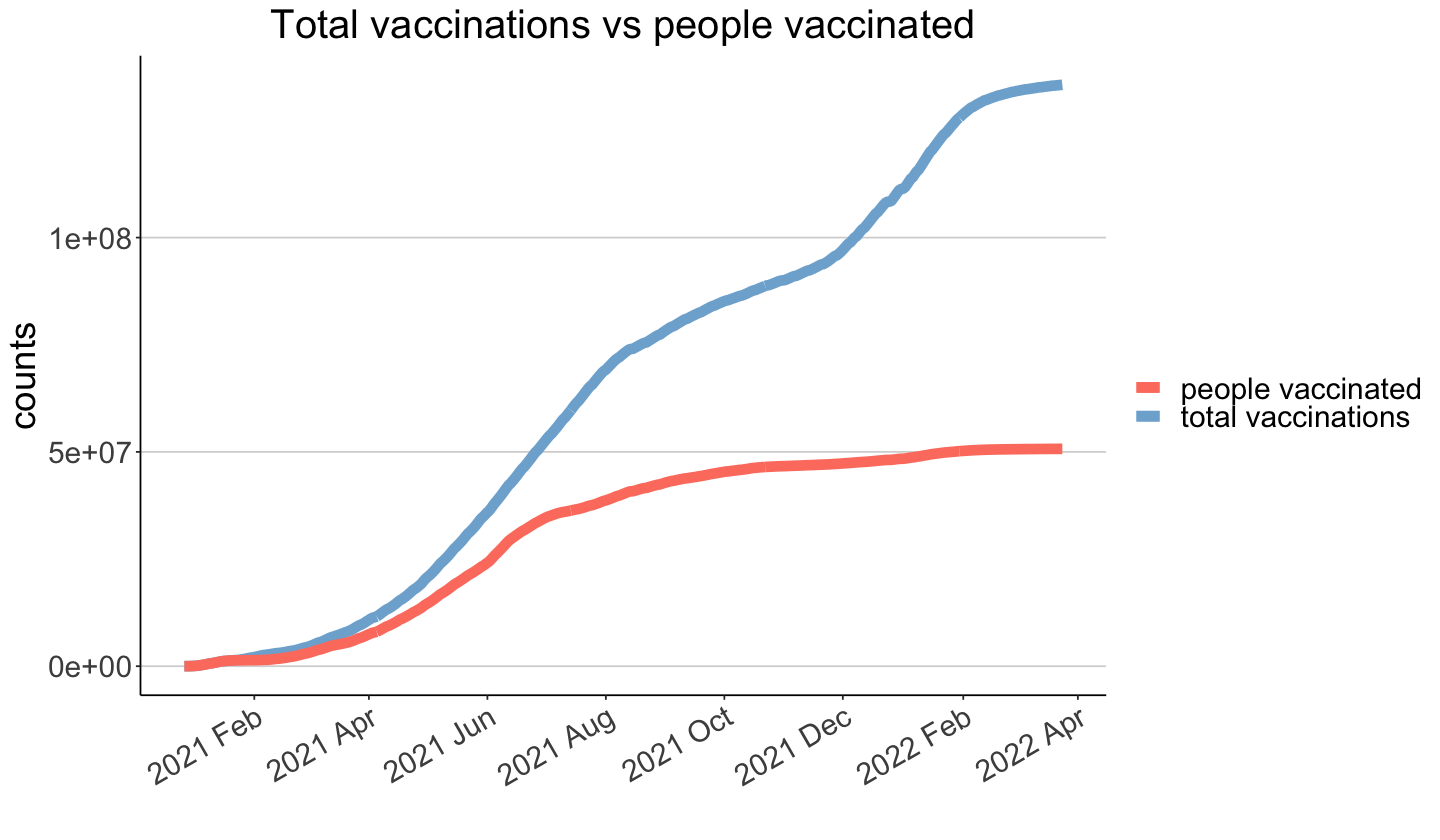

In [7]:
fontsize=22

plt1 <- ggplot(it_vaccine) + 
geom_line(
    aes(x=date, y=total_vaccinations, color="total vaccinations"),
    size = 3
) +
geom_line(
    aes(x=date, y=people_vaccinated, color="people vaccinated"),
    size = 3
) + 
theme_classic() +
theme(
    plot.title   = element_text(size=fontsize+2, hjust = 0.5),
    axis.title   = element_text(size=fontsize),
    axis.text    = element_text(size=fontsize-4),
    legend.title = element_text(size=fontsize),
    legend.text  = element_text(size=fontsize-4),
    panel.grid.major.y = element_line(
        color    = alpha("black",0.2),
        size     = 0.5,
        linetype = 1
    )
) +
labs(
    title = "Total vaccinations vs people vaccinated",
    x     = "",
    y     = "counts",
    color = ""
) + 
scale_color_manual(name="", values=c(colors[1], colors[2])) +
scale_x_date(date_breaks = "2 months", date_labels = "%Y %b") + 
theme(axis.text.x = element_text(angle = 30, hjust = 1)) 
#scale_y_continuous(
#    trans = log10_trans(), 
#    breaks = trans_breaks("log10", function(x) 10^x), 
#    labels = trans_format("log10", math_format(10^.x))
#)

plt1

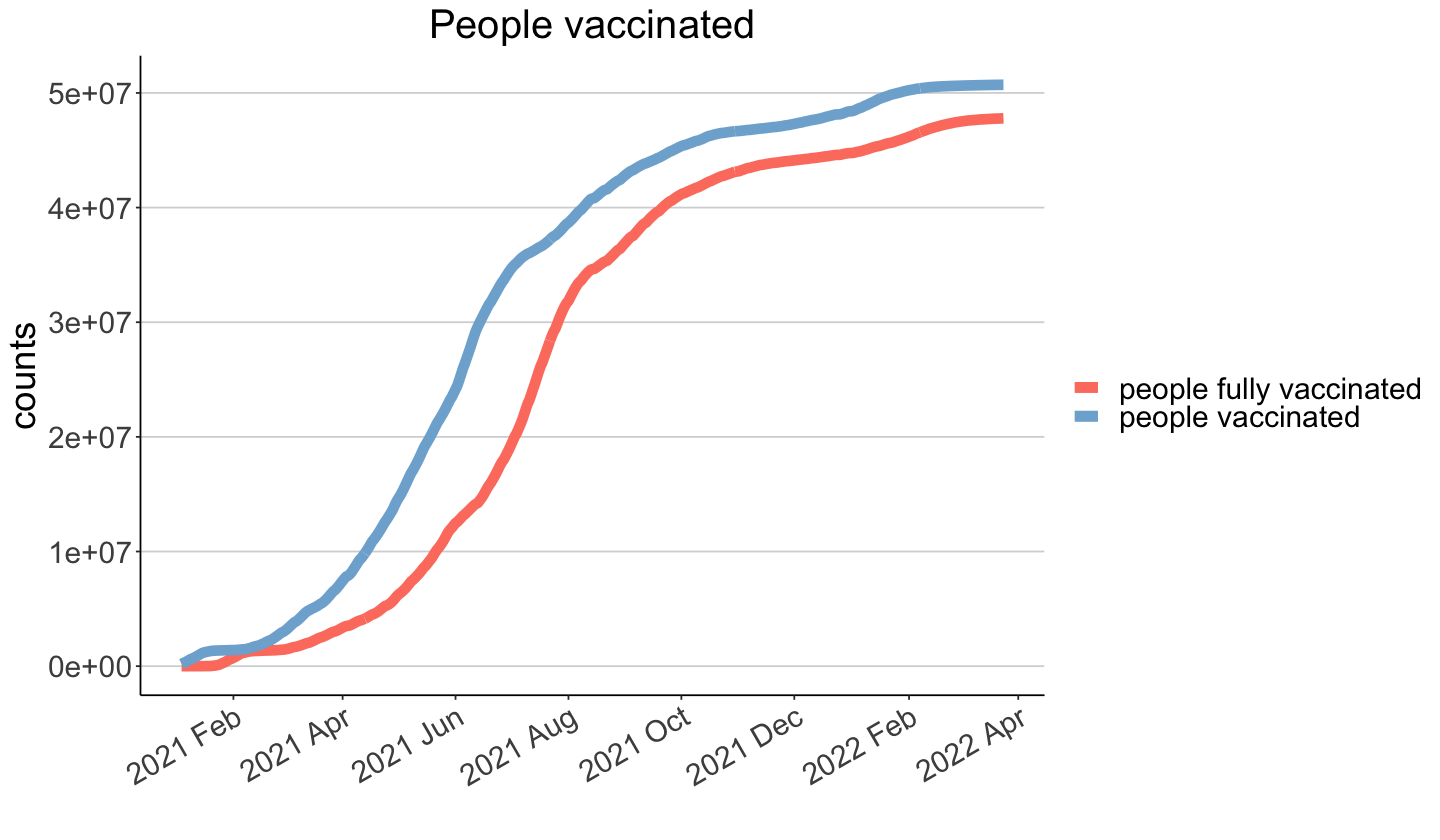

In [8]:
plt2 <- ggplot(subset(it_vaccine, !is.na(people_fully_vaccinated) & !is.na(people_vaccinated))) + 
geom_line(
    aes(x=date, y=people_fully_vaccinated, color="people fully vaccinated"),
    size = 3
) +
geom_line(
    aes(x=date, y=people_vaccinated, color="people vaccinated"),
    size = 3
) + 
theme_classic() +
theme(
    plot.title   = element_text(size=fontsize+2, hjust = 0.5),
    axis.title   = element_text(size=fontsize),
    axis.text    = element_text(size=fontsize-4),
    legend.title = element_text(size=fontsize),
    legend.text  = element_text(size=fontsize-4),
    panel.grid.major.y = element_line(
        color    = alpha("black",0.2),
        size     = 0.5,
        linetype = 1
    )
) +
labs(
    title = "People vaccinated",
    x     = "",
    y     = "counts",
    color = ""
) + 
scale_color_manual(name="", values=c(colors[1], colors[2])) +
scale_x_date(date_breaks = "2 months", date_labels = "%Y %b") + 
theme(axis.text.x = element_text(angle = 30, hjust = 1))
#scale_y_continuous(
#    trans = log10_trans(), 
#    breaks = trans_breaks("log10", function(x) 10^x), 
#    labels = trans_format("log10", math_format(10^.x))
#)

plt2

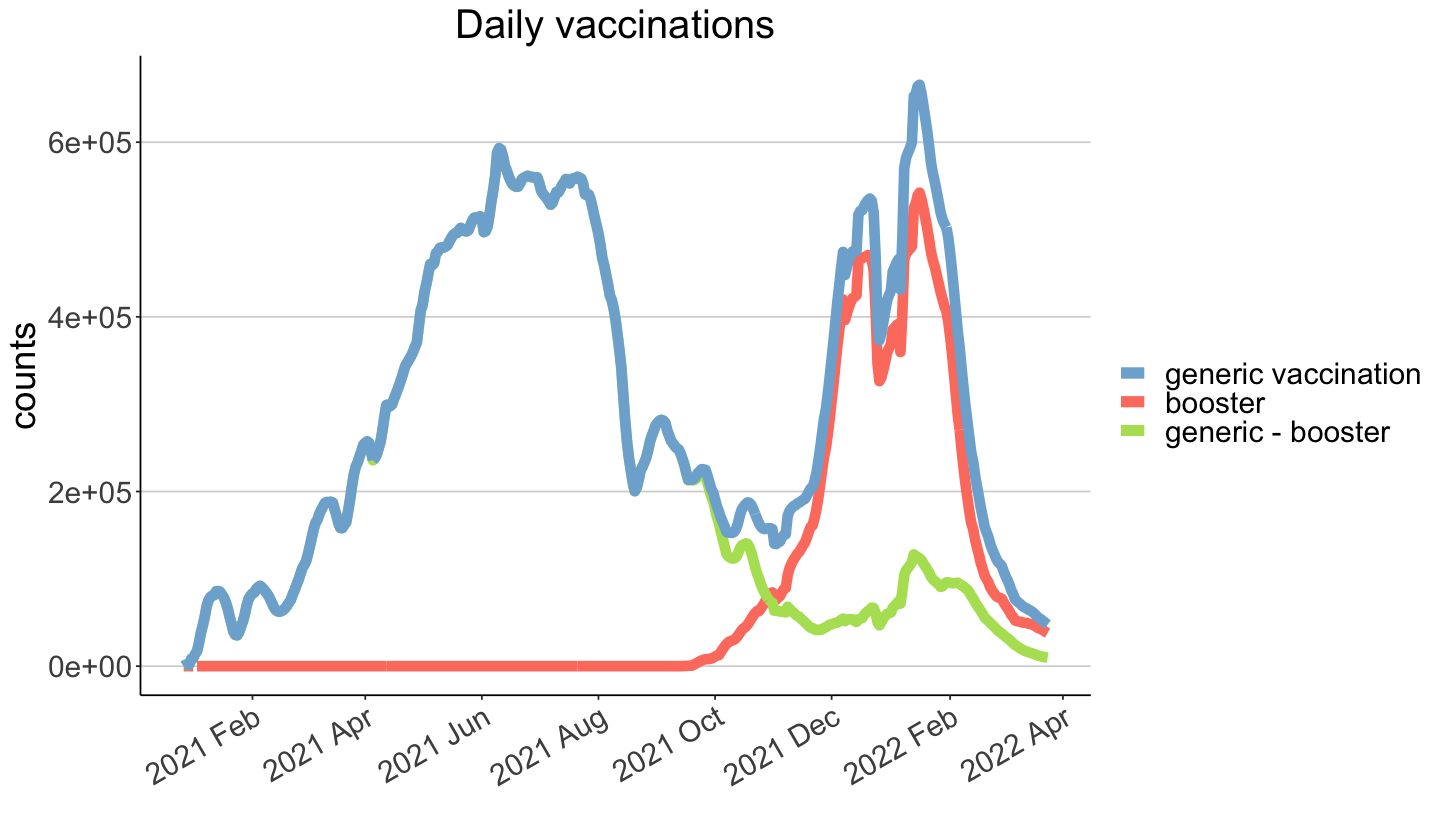

In [9]:
it_vaccine[,"total_boosters"] <- replace_na(it_vaccine$total_boosters, 0)
it_vaccine[,"daily_vaccinations"] <- replace_na(it_vaccine$daily_vaccinations, 0)
it_vaccine[,"daily_boosters"] <- c(NA,diff(it_vaccine$total_boosters))
it_vaccine[,"daily_boosters_smooth"] <- rollmean(
    it_vaccine$daily_boosters, k=7, fill=0, align="right"
)


plt3 <- ggplot(it_vaccine) + 

geom_line(
    aes(
        x=date, 
        y=daily_boosters_smooth, 
        color="booster"
    ),
    size = 3
) + 

geom_line(
    aes(
        x=date, 
        y=daily_vaccinations-daily_boosters_smooth, 
        color="generic - booster"
    ),         
    size = 3
) + 

geom_line(
    aes(
        x=date, 
        y=daily_vaccinations, 
        color="generic vaccination"
    ),
    size = 3
) +

theme_classic() +
theme(
    plot.title   = element_text(size=fontsize+2, hjust = 0.5),
    axis.title   = element_text(size=fontsize),
    axis.text    = element_text(size=fontsize-4),
    legend.title = element_text(size=fontsize),
    legend.text  = element_text(size=fontsize-4),
    panel.grid.major.y = element_line(
        color    = alpha("black",0.2),
        size     = 0.5,
        linetype = 1
    )
) +
labs(
    title = "Daily vaccinations",
    x     = "",
    y     = "counts",
    color = ""
) + 
scale_color_manual(name="", values=c(
    "generic vaccination" = colors[2], 
    "booster"             = colors[1], 
    "generic - booster"   = colors[3])
) +
scale_x_date(date_breaks = "2 months", date_labels = "%Y %b") + 
theme(axis.text.x = element_text(angle = 30, hjust = 1))

plt3

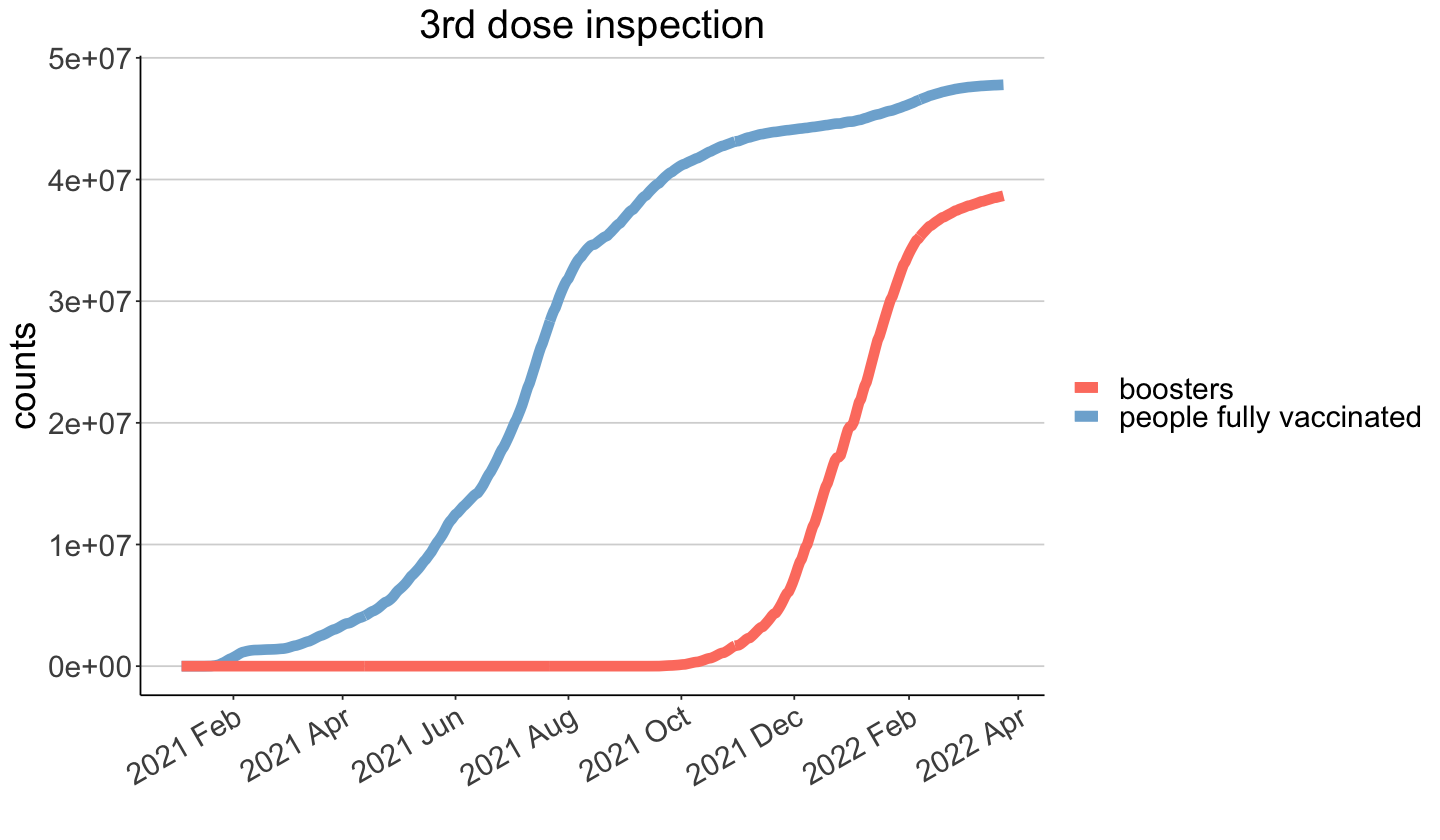

In [14]:
plt2 <- ggplot(subset(it_vaccine, !is.na(people_fully_vaccinated) & !is.na(total_boosters))) + 
geom_line(
    aes(x=date, y=people_fully_vaccinated, color="people fully vaccinated"),
    size = 3
) +
geom_line(
    aes(x=date, y=total_boosters, color="boosters"),
    size = 3
) + 
theme_classic() +
theme(
    plot.title   = element_text(size=fontsize+2, hjust = 0.5),
    axis.title   = element_text(size=fontsize),
    axis.text    = element_text(size=fontsize-4),
    legend.title = element_text(size=fontsize),
    legend.text  = element_text(size=fontsize-4),
    panel.grid.major.y = element_line(
        color    = alpha("black",0.2),
        size     = 0.5,
        linetype = 1
    )
) +
labs(
    title = "3rd dose inspection",
    x     = "",
    y     = "counts",
    color = ""
) + 
scale_color_manual(name="", values=c(colors[1], colors[2])) +
scale_x_date(date_breaks = "2 months", date_labels = "%Y %b") + 
theme(axis.text.x = element_text(angle = 30, hjust = 1))

plt2

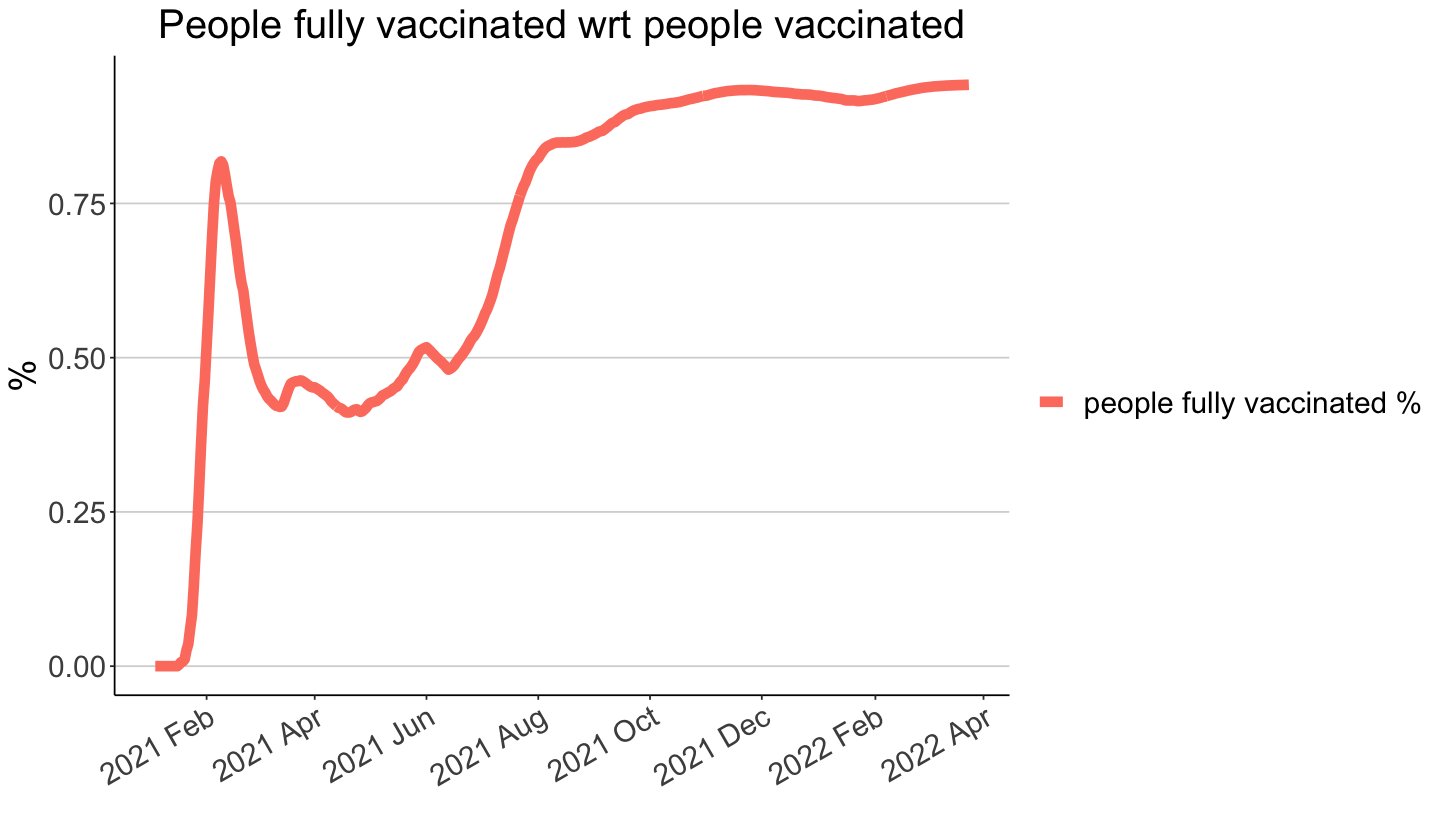

In [17]:
it_vaccine[,"fully_vaccinated_pc"] <- it_vaccine[,"people_fully_vaccinated"] / it_vaccine[,"people_vaccinated"]

plt2 <- ggplot(subset(it_vaccine, !is.na(people_fully_vaccinated) & !is.na(total_boosters))) + 
geom_line(
    aes(x=date, y=fully_vaccinated_pc, color="people fully vaccinated %"),
    size = 3
) +
theme_classic() +
theme(
    plot.title   = element_text(size=fontsize+2, hjust = 0.5),
    axis.title   = element_text(size=fontsize),
    axis.text    = element_text(size=fontsize-4),
    legend.title = element_text(size=fontsize),
    legend.text  = element_text(size=fontsize-4),
    panel.grid.major.y = element_line(
        color    = alpha("black",0.2),
        size     = 0.5,
        linetype = 1
    )
) +
labs(
    title = "People fully vaccinated wrt people vaccinated",
    x     = "",
    y     = "%",
    color = ""
) + 
scale_color_manual(name="", values=c(colors[1], colors[2])) +
scale_x_date(date_breaks = "2 months", date_labels = "%Y %b") + 
theme(axis.text.x = element_text(angle = 30, hjust = 1))

plt2